# 11.1 Natural language processing: The bird’s eye view

在计算机科学中，我们将英语或普通话等人类语言称为“自然”语言，以将其与为机器设计的语言（如汇编、LISP或XML）区分开来。每一种机器语言都是设计于：它的出发点是人类工程师写下一套正式规则，以描述你可以用这种语言做出什么声明以及它们的含义。首先定义规则，人们只有在规则集完成后才开始使用语言。对于人类语言来说，情况正好相反：用法先出现，规则后出现。自然语言是由进化过程形成的，就像生物有机体一样——这就是它“自然”的原因。它的“规则”与英语语法一样，在事后被正式化，并经常被用户忽视或破坏。结果就是， 机器语言结构严谨，使用精确的句法规则从固定的词汇中将精确定义的概念编织在一起，自然语言混乱——模棱两可、混乱、蔓延，并且不断变化。

创建能够理解自然语言的算法是一件大事：语言，特别是文本，是我们大多数沟通和文化生产的基础。互联网主要是文本。语言是我们储存几乎所有知识的方式。我们的想法在很大程度上建立在语言上。然而，长期以来，机器一直不具有理解自然语言的能力。有些人曾经天真地认为你可以简单地写下“英语规则集”，就像一个人可以写下LISP的规则集一样。工程师和语言学家会手工制作复杂的规则集来执行基本的机器翻译或创建简单的聊天机器人——例如20世纪60年代著名的ELIZA程序，它使用模式匹配来维持非常基本的对话。

手工制作的规则在20世纪90年代一直是主导方法。但从20世纪80年代末开始，更快的计算机和更大的数据可用性开始使更好的替代方案变得可行。当你发现自己正在构建大量临时规则的系统时，作为一个聪明的工程师，你可能会开始问：“我可以使用语料数据来自动化查找这些规则的过程吗？我可以在某种规则空间中搜索规则吗，而不必自己想出它们？” 就这样，机器学习产生了。因此，在20世纪80年代末，我们开始看到自然语言处理的机器学习方法。最早的是基于决策树——其意图实际上是自动开发以前系统的if/then/else规则。然后统计方法开始加快速度，从逻辑回归开始。随着时间的推移，学习的参数模型完全占据了上行，语言学被视为一种恍惚而不是一种有用的工具。早期语音识别研究员Frederick Jelinek在20世纪90年代开玩笑说：“每次我解雇语言学家，语音识别器的表现都会上升。”

这就是现代NLP的意义所在：使用机器学习和大型数据集使计算机能够不理解语言，这是一个更崇高的目标，而是摄入一种语言作为输入并返回有用的东西，例如预测以下内容：

- “这篇文本的主题是什么？”（文本分类）
- “此文本是否包含滥用？”（内容过滤）
- “此文本听起来是正面的还是负面的？”（情绪分析）
- “这个不完整的句子中的下一个单词应该是什么？”（语言建模）
- “某句话用德语怎么说？”（翻译）
- “你会如何用一段来总结这篇文章？”（总结）
- etc.

当然，在整个章节中请记住，您将训练的文本处理模型不会对语言有人性化的理解；相反，他们只是在输入数据中寻找统计规律，事实证明这足以很好地完成许多简单的任务。与计算机视觉适用于像素的模式识别一样，NLP是应用于单词、句子和段落的模式识别。

NLP的工具集——决策树、逻辑回归——从20世纪90年代到2010年代初只经历了缓慢的演变。大部分研究重点是特征工程。2013年，当我在Kaggle上赢得我的第一次NLP比赛时，你猜对了，我的模型是基于决策树和逻辑回归。然而，在2014-2015年左右，事情终于开始发生了变化。多名研究人员开始调查循环神经网络的语言理解能力，特别是LSTM——一种从20世纪90年代末开始一直未被探索的序列处理算法。

2015年初，Keras提供了LSTM的第一个开源、易于使用的实现，就在对大规模神经网络重新引发的大规模兴趣浪潮之初——在此之前，只有“研究代码”无法轻易重用。然后从2015年到2017年，循环神经网络主导了蓬勃发展的NLP场景。特别是双向LSTM模型，在从总结到问题回答再到机器翻译的许多重要任务上设定了最先进的技术。

最后，大约在2017-2018年，一个新的架构出现了，取代了RNN：Transformer，您将在本章的后半部分了解这一点。Transformer 在短时间内解锁了整个领域的大量进展，今天大多数NLP系统都基于它们。

让我们深入了解细节。本章将带您从最基本的到使用 Transformer 进行机器翻译。

# 11.2 Preparing text data

深度学习模型是可微函数，只能处理数值张量：它们不能以原始文本为输入。向量化文本是将文本转换为数字张量的过程。文本矢量化过程有多种形状和形式，但它们都遵循相同的模板（见图11.1）：

- 首先，您将文本标准化，使其更容易处理，例如将其转换为小写或删除标点符号。
- 您可以将文本拆分为单元（称为 `token` ），例如字符、单词或单词组。这叫做 `tokenize`。
- 您可以将每个此类 `token` 转换为数字矢量。这通常涉及首先对数据中存在的所有 `token` 进行索引。

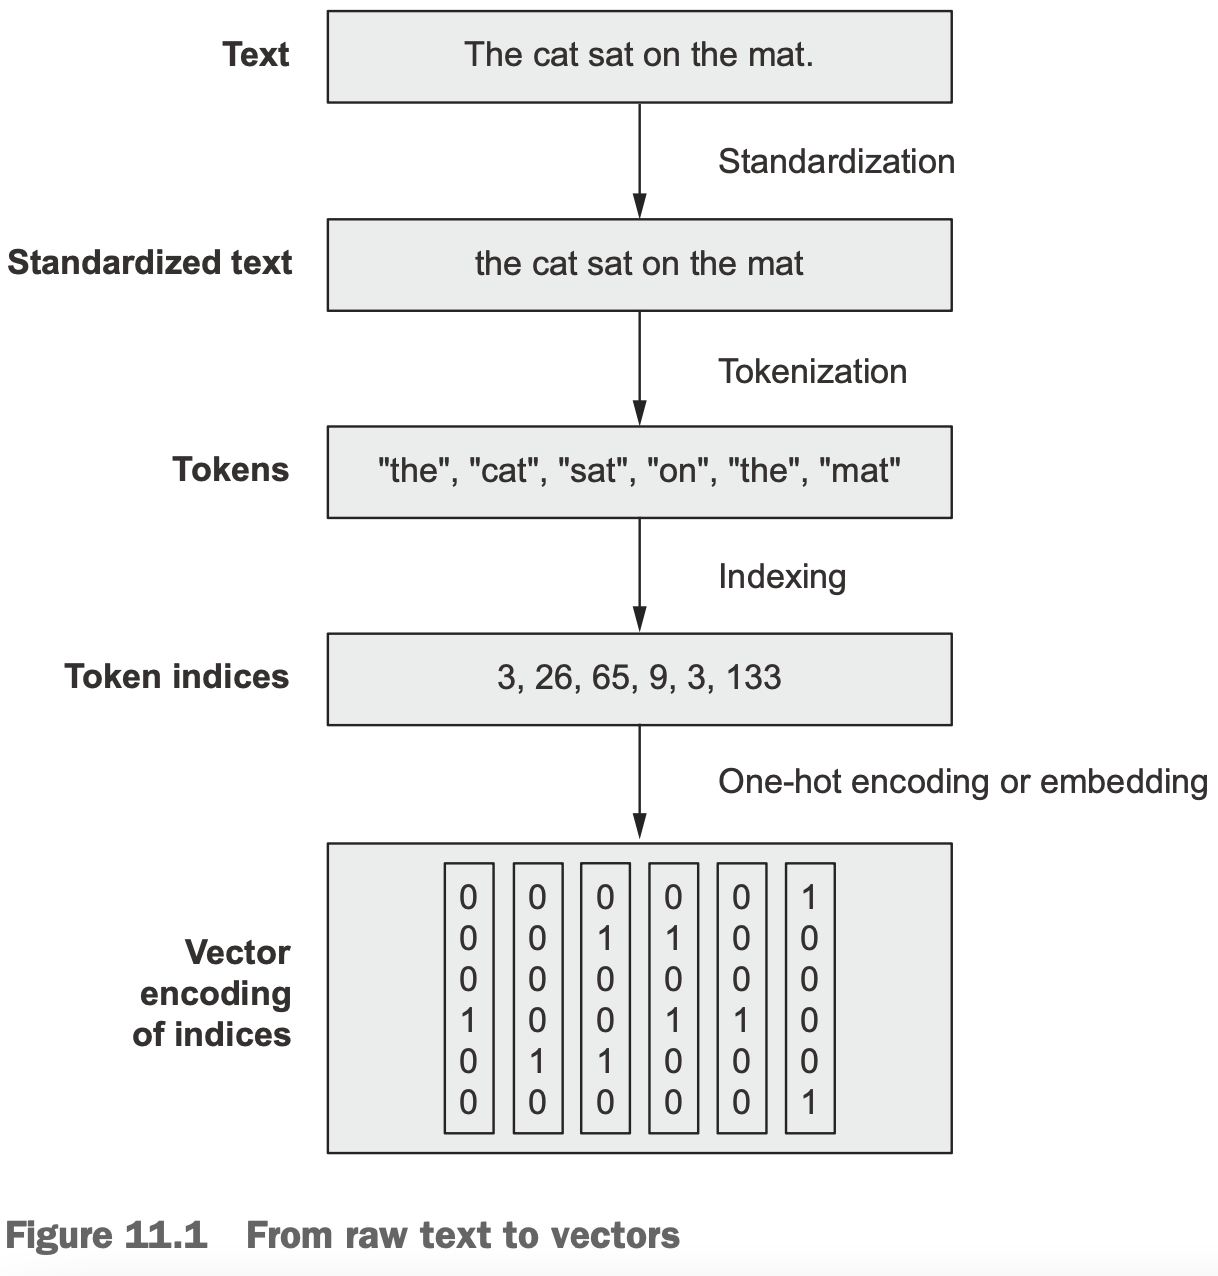

## 11.2.1 Text standardization

考虑以下两句话：

- “sunset came. i was staring at the Mexico sky. Isnt nature splendid??”
- “Sunset came; I stared at the México sky. Isn’t nature splendid?”

它们非常相似——事实上，它们几乎相同。然而，如果您将它们转换为字节字符串，它们最终会得到非常不同的表示形式，因为“i”和“I”是两个不同的字符，“墨西哥”和“墨西哥”是两个不同的单词，“不是” 不是 “不是”，依此类推。机器学习模型先验地不知道“i”和“I”是同一个字母，“é”是带有口音的“e”，或者“staring”和“stared”是同一动词的两种形式。

文本标准化是特征工程的基本形式，旨在消除您不希望模型处理的编码差异。它也不是机器学习所独有的——如果你正在构建搜索引擎，你也必须做同样的事情。

最简单、最广泛的标准化方案之一是“转换为小写并删除标点符号字符”。我们的两句话会变成：

- “sunset came i was staring at the mexico sky isnt nature splendid”
- “sunset came i stared at the méxico sky isnt nature splendid”

已经更近了。另一个常见的转换是将特殊字符转换为标准形式，例如将“é”替换为“e”，将“æ”替换为“ae”，等等。然后，我们的 token “méxico”将成为“mexico”。

最后，一种在机器学习上下文中更罕见使用的更高级的标准化模式源于：将术语的变体（如动词的不同内容共轭形式）转换为单一的共享表示形式，例如将“`caught`” 和 “`been caching`” 转换为“`[catch]`” 或将 “`cats`” 转换为“`cat`”。有了词干，“`was staring`”和 “`stared`” 会变成 “`[stare]`”，我们两个相似的句子最终会以相同的编码结束：

- “sunset came i `[stare]` at the mexico sky isnt nature splendid”

有了这些标准化技术，您的模型将需要更少的训练数据，并将更好的泛化能力——它不需要 “Sunset” 和 “sunset” 的大量示例来了解它们的意思相同，即使它只在训练集中看到“mexico”，它也能够理解“México”。当然，标准化也可能抹去一些信息，所以请始终记住上下文：例如，如果您正在编写从面试文章中提取问题的模型，它绝对应该处理“?”作为单独的`token`，而不是删除它，因为它是这个特定任务的有用信号。

## 11.2.2 Text splitting (tokenization)

一旦您的文本标准化，您需要将其分解为要向量化的单位(`tokens`)，这是一个称为 `tokenization` 的步骤。您可以通过三种不同的方式做到这一点：

- Word-level tokenization —— token 是空格分隔（或标点分隔）的子字符串。一种变体是酌情将单词进一步拆分为子词——例如，将 “staring” 视为 “star+ing” 或 “calling” 视为 “call+ed”。
- N-gram tokenization —— 其中 tokens 是N个连续单词的组。例如，“the cat” 或 “he was” 将是 2-gram 的 tokens (也称为bigrams)。
- Character-level tokenization —— 每个字符都是自己的 token。在实践中，这个方案很少使用，你只能在文本生成或语音识别等专业上下文中真正看到它。

一般来说，您将始终使用 `word-level` 或 `N-gram` tokenization。有两种文本处理模型：一种是关心单词顺序的模型，称为 `Sequence models`，另一种是将输入单词视为集合，放弃其原始顺序的模型，称为 `bag-of-words models`。 如果您正在构建序列模型，您将使用 word-level tokenization，如果您正在构建 bag-of-words 模型，您将使用N-gram tokenization。N-grams是一种人为地向模型注入少量本地单词顺序信息的方法。在这一章中，您将了解有关每种类型以及何时使用它们的更多信息。


## 11.2.3 Vocabulary indexing


文本拆分为 tokens 后，您需要将每个 token 编码为数字表示形式。您可以以无状态的方式做到这一点，例如将每个token 散列到一个固定的二进制矢量中，但在实践中，您这样做的方式是构建训练数据中所有项的索引（“vocabulary”），并为词汇表中的每个条目分配一个唯一的整数。

```
vocabulary = {}
for text in dataset:
text = standardize(text) tokens = tokenize(text) for token in tokens:
if token not in vocabulary: vocabulary[token] = len(vocabulary)
```

然后，您可以将该整数转换为矢量编码，该编码可由神经网络处理，如独热矢量：

```
def one_hot_encode_token(token):
vector = np.zeros((len(vocabulary),)) token_index = vocabulary[token] vector[token_index] = 1
return vector
```

请注意，在此步骤中，通常将词汇量限制在训练数据中最常见的20,000或30,000个最常见的单词。任何文本数据集都倾向于呈现极其多的独特项，其中大多数只出现一两次——索引这些频率低的项将导致功能空间过大，其中大多数特征几乎没有信息内容。

还记得您在第4章和第5章中训练IMDB数据集的第一个深度学习模型时吗？您从`keras.datasets.imdb` 使用的数据已经预处理成整数序列，其中每个整数代表给定单词。当时，我们使用了 `num_words=10000` 的设置，以便将我们的 vocabulary 限制在训练数据中最常见的10,000个单词。

现在，这里有一个我们不应该忽视的重要细节：当我们在词汇索引中查找新 `token` 时，它可能不一定存在。您的培训数据可能不包含“cherimoya”一词的任何实例（或者您可能将其排除在索引之外，因为它太罕见），因此做`token_index = vocabulary[“cherimoya”]` 可能会导致 `KeyError` 。要处理这个问题，您应该使用“out of vocabulary”索引（缩写为OOV index）—— 这是索引中未包含的 token 的索引。它通常是索引1：您实际上是在做 `token_index = vocabulary.get(token,1)`。将整数序列解码回单词时，您将1替换为 “`[UNK]` ”（称之为“OOV token”）。

“为什么要使用1而不是0？”你可能会问。这是因为已经拿走了0。您通常使用两种特殊令牌：`OOV token`（索引1）和 `mask token`（索引0）。虽然`OOV token` 意味着 “这是一个我们没有识别的单词”，但 `mask token` 告诉我们 “忽略我，我不是一个单词”。您将使用它来填充序列数据：由于数据批处理需要连续，因此批次序列数据中的所有序列必须具有相同的长度，因此较短的序列应填充到最长序列的长度上。如果您想使用序列 `[5、7、124、4、89]` 和 `[8、34、21]` 制作一批数据，则必须如下所示：

```
[[5,  7, 124, 4, 89]
 [8, 34,  21, 0,  0]]
```

## 11.2.4 Using the TextVectorization layer

到目前为止，我介绍的每个步骤都非常容易在纯Python中实现。也许你可以写这样的东西：

In [1]:
import string

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text
                       if char not in string.punctuation)
    
    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()
    
    def make_vocabulary(self, dataset):
        self.vocabulary = {"":0, "[UNK]":1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
                    
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())
    
    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]
    
    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)
    
vectorizer = Vectorizer()
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)
            

In [2]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
print(encoded_sentence)


[2, 3, 5, 7, 1, 5, 6]


In [3]:
decoded_sentence = vectorizer.decode(encoded_sentence)
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


然而，使用这样的东西不会很有表现。在实践中，您将使用 `Keras TextVectorization` 层，该层快速高效，可以直接放入 `tf.data` pipeline 或 Keras模型中。

In [4]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    output_mode="int",
)

默认情况下，`TextVectorization` 层将使用 “转换为小写并删除标点符号” 进行文本标准化，使用“split on whitespace”进行 tokenization。但重要的是，您可以为 standardize 和 tokenization 提供自定义功能，这意味着该层足够灵活，可以处理任何用例。请注意，此类自定义函数应在 `tf.string` 张量上运行，而不是常规Python字符串！例如，默认层行为等同于以下内容：

In [5]:
import re
import string
import tensorflow as tf

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor)
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "")

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)

text_vectorization = TextVectorization(
    output_mode = "int",
    standardize = custom_standardization_fn,
    split = custom_split_fn
)

要索引文本语料库的 vocabulary ，只需调用带有生成字符串的 `Dataset` 对象的 layer 的 `adapt()` 方法，或仅使用Python字符串列表：

In [6]:
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
text_vectorization.adapt(dataset)

2022-03-13 10:19:32.447333: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-13 10:19:32.447476: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


请注意，您可以通过 `get_vocabulary()` 检索计算的词汇表——如果您需要将编码为整数序列的文本转换为单词，这可能会很有用。词汇表的前两个条目是 mask token（索引0）和 OOV token（索引1）。词汇表中的条目按频率排序，因此对于现实世界的数据集，像“the”或“a”这样的非常常见的单词将是第一位的。

In [7]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'erase',
 'write',
 'then',
 'rewrite',
 'poppy',
 'i',
 'blooms',
 'and',
 'again',
 'a']

In [8]:
vocabulary = text_vectorization.get_vocabulary()
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = text_vectorization(test_sentence)
print(encoded_sentence)

tf.Tensor([ 7  3  5  9  1  5 10], shape=(7,), dtype=int64)


In [9]:
inverse_vocab = dict(enumerate(vocabulary))
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


**在 `tf.data` pipeline中或作为模型的一部分使用`TextVectorization` 层**

重要的是，由于 `TextVectorization` 主要是一个字典查找操作，它无法在GPU（或TPU）上执行——只能在CPU上执行。因此，如果您在GPU上训练模型，您的 `TextVectorization` 层将在将其输出发送到GPU之前在CPU上运行。这具有重要的性能影响。

我们有两种方法可以使用我们的 `TextVectorization` 层。第一个选项是将其放入 `tf.data` pipeline，如下所示：

```python
int_sequence_dataset = string_dataset.map(
    text_vectorization,
    num_parallel_calls=4)
```

第二个选项是使其成为模型的一部分（毕竟，它是一个Keras层），如下所示：

```python
text_input = keras.Input(shape=(), dtype="string") vectorized_text = text_vectorization(text_input) embedded_input = keras.layers.Embedding(...)(vectorized_text) output = ...
model = keras.Model(text_input, output)
```

两者之间有一个重要的区别：如果矢量化步骤是模型的一部分，它将与模型的其余部分同步发生。这意味着在每个训练步骤中，模型的其余部分（放置在GPU上）必须等待 `TextVectorization` 层（放置在CPU上）的输出准备就绪才能开始工作。同时， 将层放在 `tf.data` pipeline 使你在 CPU 上异步处理你的数据： 当GPU在一批矢量数据上运行模型时，CPU通过矢量化下一批原始字符串来保持忙碌。 

因此，如果您在GPU或TPU上训练模型，您可能希望使用第一个选项来获得最佳性能。这就是我们将在本章的所有实际示例中做的事情。然而，在CPU上训练时，同步处理是可以的：无论您选择哪个选项，您都可以100%地利用内核。

现在，如果您要将我们的模型导出到生产环境中，您希望发布一个接受原始字符串作为输入的模型，例如在上面第二个选项的代码片段中——否则您必须在生产环境中（可能是在JavaScript中？）重新实现文本 standardization 和 tokenization，您将面临引入预处理差异的风险，这将损害模型的准确性。`TextVectorization` 层使您可以将文本预处理直接包含在模型中，从而更容易部署——即使您最初将该层用作tf.data管道的一部分。在边栏“导出处理原始字符串的模型”中，您将了解如何导出包含文本预处理的仅推理训练模型。

# 11.3 Two approaches for representing groups of words: Sets and sequences

机器学习模型应该如何表示单个单词是一个相对没有争议的问题：它们是类别特征（预定义集合中的值），我们知道如何处理这些特征。它们应该编码为特征空间中的维度，或类别矢量（在这种情况下为word vectors）。然而，一个更成问题的问题是如何编码单词组成句子的顺序： word order。

自然语言中的顺序问题很有趣：与时间序列的步骤不同，句子中的单词没有自然的规范顺序。不同的语言以非常不同的方式排列相似的单词。例如，英语的句子结构与日语有很大不同。即使在给定的语言中，您通常也可以通过稍微改写单词来以不同的方式说同样的话。更进一步，如果你在短句中完全随机化单词，你仍然可以在很大程度上弄清楚它的意思——尽管在许多情况下似乎出现了明显的歧义。顺序显然很重要，但它与意义的关系并不简单。

如何表示单词顺序是不同类型的NLP架构源泉的关键问题。你能做的最简单的事情就是放弃顺序，将文本视为一组无序的单词 —— `bag-of-words models`。您还可以决定应该严格按照单词出现的顺序处理单词，一次一个，就像时间序列中的步骤一样——利用循环模型。Transformer 结构在技术上是顺序不可知的，但它将单词位置信息注入到它处理的表征中，这使得它能够在仍然了解顺序的同时同时查看句子的不同部分（与RNN不同）。由于它们考虑了单词顺序，RNN 和 Transformer 都被称为 `sequence models`。

从历史上看，机器学习在NLP中的大多数早期应用都涉及 `bag-of-words models`。随着循环神经网络的重生，对序列模型的兴趣直到2015年开始上升。今天，这两种方法仍然相关。让我们看看它们是如何工作的，以及何时利用它们。

我们将在一个众所周知的文本分类基准上演示每种方法：IMDB电影评论情绪分类数据集。在第4章和第5章中，您处理了IMDB数据集的预向量版本；现在，让我们处理原始IMDB文本数据，就像您在现实世界中处理新的文本分类问题时所做的那样。

## 11.3.1 Preparing the IMDB movie reviews data

让我们从Andrew Maas的斯坦福页面下载数据集并解压缩开始：

```
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
```

您只剩下一个名为aclImdb的目录，其结构如下：

```
aclImdb/
...train/
......pos/
......neg/
...test/
......pos/
......neg/
```

例如，`train/pos/` 目录包含一组12,500个文本文件，每个文件都包含积极情绪电影评论的文本正文，用作训练数据。负面情绪评论生活在“neg”目录中。总共有25,000个文本文件用于训练，另外25,000个用于测试。

那里还有一个 `train/unsup` 的子目录，我们不需要。让我们删除它：

```
!rm -r aclImdb/train/unsup
```

看看其中一些文本文件的内容。请看。无论您是处理文本数据还是图像数据，请记住在开始建模数据之前始终检查数据的样子。它将给予你对模型做什么的直觉：

```
!cat aclImdb/train/pos/4077_10.txt
```

接下来，我们来准备一个验证集，在新目录，aclImdb/val：

In [10]:
import os, pathlib, shutil, random

base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)

FileExistsError: [Errno 17] File exists: 'aclImdb/val/neg'

还记得在第8章中，我们如何使用 `image_dataset_from_directory` 程序为目录结构创建批量的图像数据集及其标签吗？您可以使用`text_dataset_from_directory` 程序对文本文件执行完全相同的操作。让我们创建三个用于训练、验证和测试的 `Dataset` 对象：

In [11]:
from tensorflow import keras
batch_size = 32

train_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train", batch_size=batch_size
)
val_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory( 
    "aclImdb/test", batch_size=batch_size
)

/Users/shawnd/miniforge3/envs/keras/lib/python3.8/multiprocessing/resource_tracker.py:96: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


这些数据集产生的输入是TensorFlow `tf.string` 张量和目标，它们是编码值“0”或“1”的 `int32` 张量。

In [12]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor(b'Trick or Treat, Quickie Review This zany romp of a film revolves around the 80\'s culture of Heavy Metal and horror movies--two things which I love dearly. So, as you can imagine, this movie appealed to me pretty easily. Plus, for no apparent reason, Ozzy Osbourne plays a preacher.<br /><br />This film is about an unpopular high school youth who, like all us losers, ended up drenched in a world of "evil" Heavy Metal. His favorite Metaldude dies and, of course, is miraculously resurrected--by playing his latest unreleased album backwards. This allows the corpsified singer to go around killing people with demons and sh*t helping out.<br /><br />Okay, it\'s pretty cheesy at times, but you know what? It\'s got a surprising number of good qualities. Decent acting (including Gene Simmons as a radio DJ), pretty good special effects, very brief nudity, decent atmosphe

## 11.3.2 Processing words as a set: The bag-of-words approach

对文本进行编码以供机器学习模型处理的最简单方法是丢弃顺序，并将其视为一组（“bag”） tokens。您可以查看单个单词（unigrams），也可以尝试通过查看连续 tokens 组（N-grams）来恢复一些本地顺序信息。

**SINGLE WORDS (UNIGRAMS) WITH BINARY ENCODING**

如果你用a bag of single words，“the cat sat on the mat”这句话就会变成

```
{"cat", "mat", "on", "sat", "the"}
```

这种编码的主要优点是，您可以将整个文本表示为单个矢量，其中每个条目都是给定单词的presence indicator。例如，使用二进制编码（multi-hot），您将文本编码为矢量，其维度与词汇中的单词一样多——大部分是0，文本中存在的单词编码为1。这就是我们在第4章和第5章处理文本数据时所做的。让我们在任务中试试这个。

首先，让我们使用 `TextVectorization` 层处理原始文本数据集，以便它们产生 `multi-hot` 编码的二进制单词矢量。我们的层只看单个单词（即`unigrams`）。

In [13]:
text_vectorization = TextVectorization(
    max_tokens = 20000,
    output_mode = "multi_hot",
)
text_only_train_ds = train_ds.map(lambda x, y:x)
text_vectorization.adapt(text_only_train_ds)

binary_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y), 
    num_parallel_calls=4)
binary_1gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y), 
    num_parallel_calls=4)

您可以尝试检查其中一个数据集的输出。

In [14]:
for inputs, targets in binary_1gram_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32, 20000)
inputs.dtype: <dtype: 'float32'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
targets[0]: tf.Tensor(1, shape=(), dtype=int32)


接下来，让我们写一个可重用的模型构建函数，我们将在本节的所有实验中使用。

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(max_tokens=20000, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens, ))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model
    

In [ ]:
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_1gram.keras",
                                    save_best_only=True)
]
model.fit(binary_1gram_train_ds.cache(),
          validation_data=binary_1gram_val_ds.cache(),
          epochs=1,
          callbacks=callbacks)
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")

这让我们的测试精度达到89.2%：还不错！请注意，在这种情况下，由于数据集是一个平衡的两类分类数据集（正样本和负样本一样多），我们无需训练实际模型即可达到的“naive baseline”将只有50%。与此同时，在不利用外部数据的情况下，在这个数据集中可以达到的最佳分数约为95%的测试精度。

**BIGRAMS WITH BINARY ENCODING**

当然，放弃单词顺序是非常简化的，因为即使是原子概念也可以通过多个单词来表达：“United States”一词传达了一个与“states”和“united”这两个词的含义截然不同的概念。出于这个原因，您通常最终会通过查看 N-grams 而不是单个单词（最常见的是bigrams）将本地顺序信息重新注入到您的字袋表示中。

对于bigrams来说，我们的句子变成了

```
{"the", "the cat", "cat", "cat sat", "sat",
 "sat on", "on", "on the", "the mat", "mat"}
```

`TextVectorization` 层可以配置为返回任意 N-gram：bigrams、trigrams等。只需传递 `ngrams=N` 参数，如以下列表所示。

In [16]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)


In [ ]:
text_vectorization.adapt(text_only_train_ds)
binary_2gram_train_ds = train_ds.map(
lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_val_ds = val_ds.map(
lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_test_ds = test_ds.map(
lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_2gram.keras",
                                    save_best_only=True)
]
model.fit(
    binary_2gram_train_ds.cache(), 
    validation_data=binary_2gram_val_ds.cache(), 
    epochs=10,
    callbacks=callbacks
)
model = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model.evaluate(binary_2gram_test_ds)[1]:.3f}")

我们现在的测试精度为90.4%，这是一个显著的改进！事实证明，本地顺序非常重要。

**BIGRAMS WITH TF-IDF ENCODING**

您还可以通过计算每个单词或 `N-gram` 出现的次数，即将单词的直方图移到文本上，为此表示添加更多信息：

```
{"the": 2, "the cat": 1, "cat": 1, "cat sat": 1, "sat": 1,
 "sat on": 1, "on": 1, "on the": 1, "the mat: 1", "mat": 1}
```

如果您正在进行文本分类，了解一个单词在样本中出现多少次至关重要：任何足够长的电影评论都可能包含“terrible”一词——较少关注情绪，但包含许多 “terrible” 一词的评论可能是负面的。

以下是使用 `TextVectorization` 层计算 bigram 的方法。

In [17]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="count"
)

当然，现在，无论文本是关于什么的，有些单词肯定会比其他单词更频繁地出现。“The”、“a”、“is”和“are”这两个词将永远主导您的字数直方图，淹没了其他单词——尽管在分类上下文中几乎是无用的特征。我们如何解决这个问题？

你已经猜到了：通过规范化。我们只需通过减去平均值并除以方差（计算在整个训练数据集中）来规范字数。除了大多数矢量句子几乎完全由零组成（我们之前的示例包含12个非零条目和19,988个零条目），这是一个名为“稀疏”的属性。这是一个很棒的属性，因为它极大地减少了计算负载并降低了过拟合的风险。如果我们从每个特征中减去平均值，我们将破坏稀疏度。因此，无论我们使用什么规范化方案，都应该是 divide-only 的。那么，我们应该用什么作为分母呢？最好的做法是选择所谓的 `TF-IDF normalization` ——TF-IDF代表“term frequency, inverse document frequency”。

TF-IDF非常常见，因此内置在TextVectorization层中。要开始使用它，您只需要将 `output_mode` 参数切换到 “tf_idf”。

**Understanding TF-IDF normalization**

给定的项在文档中出现得越多，该项对于了解文档的内容就越重要。与此同时，该项出现在数据集中所有文档中的频率也很重要：几乎每个文档中出现的项（如“the”或“a”）信息量不大，而仅出现在所有文本的一小部分（如“Herzog”）中的术语非常独特，因此很重要。 TF-IDF是一个融合这两种想法的指标。它通过取“term frequency”来加权给定的项，该项在当前文档中的出现次数，并将其除以“document frequency”的度量，该度量估计该项在数据集中出现的频率。

In [18]:
def tfidf(term, document, dataset):
    term_freq = document.count(term)
    doc_feq = math.log(sum(doc.count(term) for doc in dataset) + 1)
    return ter_feq / doc_feq


In [19]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="tf_idf",
)

In [ ]:
text_vectorization.adapt(text_only_train_ds)
tfidf_2gram_train_ds = train_ds.map(
lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
tfidf_2gram_val_ds = val_ds.map(
lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
tfidf_2gram_test_ds = test_ds.map(
lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",
                                    save_best_only=True)
]
model.fit(tfidf_2gram_train_ds.cache(),
          validation_data=tfidf_2gram_val_ds.cache(), 
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("tfidf_2gram.keras") 
print(f"Test acc: {model.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

这为我们提供了89.8%的IMDB分类任务的测试准确性：在这种情况下，它似乎并不特别有帮助。然而，对于许多文本分类数据集来说，与普通二进制编码相比，使用TF-IDF时通常会增加一个百分点。

**Exporting a model that processes raw strings**

在前面的例子中，我们做了text standardization, splitting, 和 indexing，作为tf.data pipeline的一部分。但是，如果我们想导出该 pipeline 的独立模型，我们应该确保它包含自己的文本预处理（否则，您必须在生产环境中重新实现，这可能具有挑战性或可能导致训练数据和生产数据之间的细微差异）。这很容易。

只需创建一个新模型，重用您的 `TextVectorization` 层，并添加您刚刚训练的模型：

```python
inputs = keras.Input(shape=(1,), dtype="string")
processed_inputs = text_vectorization(inputs)
outputs = model(processed_inputs)
inference_model = keras.Model(inputs, output
```

模型可以处理批量原始字符串：

```python
import tensorflow as tf
raw_text_data = tf.convert_to_tensor([
    ["That was an excellent movie, I loved it."], 
])

predictions = inference_model(raw_text_data) 
print(f"{float(predictions[0] * 100):.2f} percent positive")
```

## 11.3.3 Processing words as a sequence: The sequence model approach

过去几个例子清楚地表明，单词顺序很重要：基于顺序的特征（如bigrams）的手动工程可以很好地提高准确性。现在请记住：深度学习的历史是从手动特征工程转向让模型仅从数据暴露中学习自己的特征。如果我们不手动制作基于顺序的特征，而是将模型暴露在原始单词序列中，并让它自己弄清楚这些功能呢？这就是 `sequence models` 的内容。

要实现序列模型，您需要首先将输入样本表示为整数索引序列（一个整数代表一个单词）。然后，您将每个整数映射到矢量以获取矢量序列。最后，您将将这些矢量序列输入一组层，这些层可以 cross-correlate 来自临近矢量的特征，例如1D convnet、RNN或Transformer。

在2016-2017年左右的一段时间里，双向RNN（特别是双向LSTM）被认为是序列建模的最新技术。我们已经熟悉了这种架构，这是我们将在第一个序列模型示例中使用的。然而，如今， 序列建模几乎普遍使用 Transformer，我们很快就会介绍。奇怪的是，一维卷积在NLP中从未非常受欢迎，尽管根据我自己的经验，residual 的 depth- wise-separable 1D卷积通常可以以大幅降低计算成本实现与 bidirectional LSTM 相当的性能。

**A FIRST PRACTICAL EXAMPLE**

让我们在实践中尝试第一个序列模型。首先，让我们准备返回整数序列的数据集。

In [23]:
from tensorflow.keras import layers

max_length = 600
max_tokens = 20000
text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
)

text_vectorization.adapt(text_only_train_ds)

int_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y), 
    num_parallel_calls=4)
int_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y), 
    num_parallel_calls=4)

接下来，让我们制作一个模型。将整数序列转换为矢量序列的最简单方法是对整数进行独热编码（每个维度将代表词汇表中的一个项的可能性）。在这些独热矢量之上，我们将添加一个简单的双向LSTM。

In [ ]:
import tensorflow as tf
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = tf.one_hot(inputs, depth=max_tokens)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs) 
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("one_hot_bidir_lstm.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds,
          validation_data=int_val_ds, 
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("one_hot_bidir_lstm.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")


第一个观察：该模型训练非常缓慢，特别是与上一节的轻量级模型相比。这是因为我们的输入相当大：每个输入样本都被编码为大小为（600，20000）的矩阵（每个样本600字，可能2万字）。单部电影评论的浮动量为1200万张。我们的bidirec-tional LSTM有很多工作要做。其次，该模型只能达到87%的测试准确率——它的表现不如我们的（非常快的）二进制unigram模型。

显然，使用独热编码将单词转换为矢量，这是我们能做的最简单的事情，这不是个好主意。有一个更好的方法：词嵌入。

**UNDERSTANDING WORD EMBEDDINGS**

至关重要的是，当您通过独热编码对某物进行编码时，您正在特征工程决策。您正在向模型注入一个关于特征空间结构的基本假设。这种假设是，您编码的不同token都是独立的：事实上，独热矢量都是彼此的正交。就语言而言，这种假设显然是错误的。单词形成一个结构化的空间：它们彼此共享信息。在大多数句子中，“movie”和“film”这两个词是可以互换的，因此代表“movie”的矢量不应该与代表“film”的矢量正交——它们应该是相同的矢量，或者足够接近。

为了更抽象一点，两个单词矢量之间的几何关系应该反映这些单词之间的语义关系。例如，在一个合理的的单词矢量空间中，您希望同义词嵌入到类似的单词矢量中，一般来说，您希望任何两个单词矢量之间的几何距离（如余弦距离或L2距离）与关联单词之间的“语义差异”有关。意味着不同事物的单词应该彼此远离，而相关单词应该更接近


词嵌入是实现这一点的单词的矢量表示：它们将人类语言映射到一个结构化的几何空间中。

通过独热编码获得的矢量是二进制的、稀疏的（大多数由零组成）和非常高的维度的（与词表中的单词数量相同），但词嵌入是低维浮点矢量（即密集的矢量，而不是稀疏的矢量）；见图11.2。词嵌入的维度为通常是 256维， 512维 或者 1024维。另一方面，独热编码单词通常会导致20,000维或以上的矢量（在这种情况下，导致20,000个 token 的vocabulary）。因此，词嵌入将更多信息打包到更少的维度中。

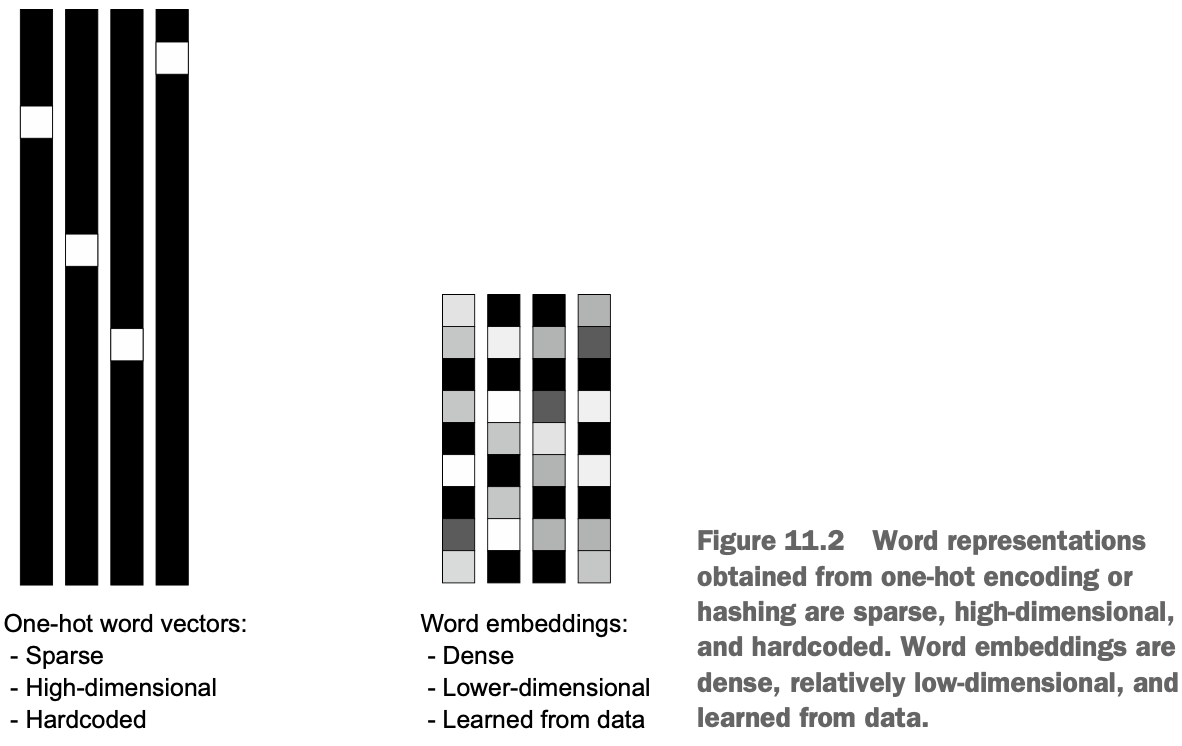

除了密集的表示外，词嵌入也是结构化表示，其结构是从数据中学习的。类似的词嵌入在近距离的位置，此外，嵌入空间中的具体方向是有意义的。为了更清楚地说明这一点，让我们看看一个具体的例子。

在图11.3中，四个词嵌入在2D平面上：猫、狗、狼和老虎。使用我们在这里选择的矢量表示，这些单词之间的一些语义关系可以编码为几何变换。例如，相同的矢量允许我们从猫到老虎，从狗到狼：这个矢量可以解释为“from pet to wild animal”矢量。同样，另一个矢量让我们从狗到猫，从狼到老虎，这可以解释为“from canine to feline”矢量。

在现实世界的词嵌入空间中，有意义的几何变换的常见例子是“gender”矢量和“plural”矢量。例如，通过向矢量“king”添加“female”矢量，我们获得矢量“queen”。通过添加“plural”矢量，我们获得“kings”。词嵌入空间通常具有数千个此类可解释和潜在有用的向量。

让我们看看如何在实践中使用这样的嵌入空间。有两种方法可以获取词嵌入：

- 结合您关心的主要任务（如文档分类或情绪预测）一起学习词嵌入。在此设置中，您从从随机词向量开始，然后以学习神经网络权重的相同方式学习词向量。
- 将使用不同于您尝试解决的机器学习任务预计算的词嵌入加载到您的模型中。这些被称为预训练的词嵌入。

**LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER**

是否有一些理想的词嵌入空间可以完美地映射人类语言，并可用于任何自然语言处理任务？可能，但我们还没有计算出此类内容。此外，没有人类语言这种东西——有很多不同的语言，它们彼此并不同构，因为一种语言是特定文化和特定背景的反映。但更务实的是，什么是好的单词嵌入空间在很大程度上取决于您的任务：英语电影评论情感分析模型的完美词嵌入空间可能看起来与英语法律文档分类模型的完美嵌入空间不同，因为某些语义关系的重要性因任务而异。

因此，在每一项新任务中学习一个新的嵌入空间是合理的。幸运的是，反向传播使这变得容易，Keras使它变得更容易。这是关于学习层的权重：`Embedding` 层。


In [21]:
embedding_layer = layers.Embedding(input_dim=max_tokens, output_dim=256)

`Embedding` 层最好理解为将整数索引（代表特定单词）映射到密集向量的字典。它以整数作为输入，在内部字典中查找这些整数，并返回关联的矢量。这完全是一个字典查找（见图11.4）。

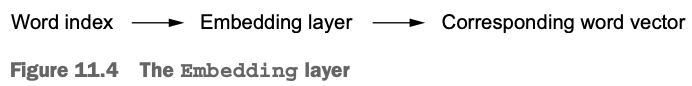

`Embedding` 层以形状 `(batch_size、seque_length)` 的秩-2张量作为输入，其中每个条目都是整数序列。然后，该层返回形状为 （batch_size、sequedding_length、embedding_dimensionality）的3D浮点张量。

当您实例化 `Embedding` 层时，其权重（其 token 矢量的内部字典）最初是随机的，就像任何其他层一样。在训练期间，这些单词矢量通过反向传播逐渐调整，将空间结构化为下游模型可以利用的东西。一旦得到充分训练，嵌入空间将显示许多结构——一种专门用于您训练模型的特定问题的结构。

让我们构建一个包含嵌入层的模型，并根据我们的任务进行基准测试。

In [25]:
inputs = keras.Input(shape=(None,), dtype="int64")
embeded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embeded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint("embeddings_bidir_gru.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, 
          validation_data=int_val_ds, 
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("embeddings_bidir_gru.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 256)         5120000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                73984     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,194,049
Trainable params: 5,194,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 141s 224ms/step - loss: 0.4815 - accuracy: 0.7795 - val_loss:

它的训练速度比独热模型快得多（因为LSTM只需要处理256维矢量，而不是20,000维），其测试精度是可比的（87%）。然而，我们离我们基本bigram模型的结果还有一段距离。原因很简单，模型查看的数据略少：bigram模型处理了完整的评论，而我们的序列模型在600个单词后截断序列。

**UNDERSTANDING PADDING AND MASKING**

这里略微损害模型性能的一件事是，我们的输入序列充满了零。这源于我们在`TextVectorization` 中使用 `output_sequence_length=max_ length` 选项（max_length等于600）：超过600个令牌的句子被截断为600个 token 的长度，短于600个令牌的句子在末尾填充了零，以便它们可以与其他序列串联在一起，形成连续的批量。

我们使用的是双向RNN：两个并行运行的RNN层，一个按自然顺序处理 tokens，另一个反向处理相同的 tokens。按自然顺序查看 tokens 的RNN将在最后一次迭代中只看到编码填充的矢量——如果原始句子很短，可能会进行几次迭代。存储在RNN内部状态下的信息将逐渐消失，因为它暴露在这些意义更少的输入中。

我们需要一些方法来告诉RNN，它应该跳过这些迭代。有一个API：`masking`。

`Embedding` 层能够生成与其输入数据对应的“mask”。此掩码是形状（batch_size，sequence_length）的1和0（的张量，其中 `mask[i，t]` 指示应该跳过样本i的时间步t在哪里（如果 `mask[i，t]` 为0或False，则将跳过时间步），否则将进行处理）。

默认情况下，此选项不激活——您可以通过将 `mask_zero=True` 传递给嵌入层来打开它。您可以使用 `compute_mask()` 方法检索 mask。

In [29]:
embedding_layer = layers.Embedding(
    input_dim=10, 
    output_dim=256, 
    mask_zero=True)
some_input = [
    [4,3,2,1,0,0,0],
    [5,4,3,2,1,0,0],
    [2,1,0,0,0,0,0]]
mask = embedding_layer.compute_mask(some_input)
mask

<tf.Tensor: shape=(3, 7), dtype=bool, numpy=
array([[ True,  True,  True,  True, False, False, False],
       [ True,  True,  True,  True,  True, False, False],
       [ True,  True, False, False, False, False, False]])>

在实践中，你几乎永远不必手动管理 mask。Keras将自动将 mask 传递给能够处理它的每个层（作为附加到它所代表序列的元数据）。RNN layers将使用此 mask 跳过 masked step。如果您的模型返回整个序列，则损失函数还将使用 mask 跳过输出序列中的 masked step。

In [32]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(
    input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
callbacks = [
keras.callbacks.ModelCheckpoint("embeddings_bidir_gru_with_masking.keras", save_best_only=True)
]
model.fit(
    int_train_ds, 
    validation_data=int_val_ds, 
    epochs=10,
    callbacks=callbacks)
model = keras.models.load_model("embeddings_bidir_gru_with_masking.keras") 
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_7 (Embedding)      (None, None, 256)         5120000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                73984     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,194,049
Trainable params: 5,194,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 176s 279ms/step - loss: 0.4053 - accuracy: 0.8162 - val_loss:

这次我们达到了88%的测试准确度——这是一个微小但显著的改进。

**USING PRETRAINED WORD EMBEDDINGS**

有时，可用的训练数据太少，以至于您无法单独使用数据来学习特定任务的词嵌入。在这种情况下，您可以从您知道结构严密且具有有用属性的预训练嵌入空间加载嵌入向量，而不是从您想要解决的问题一起学习词嵌入矢量——该属性捕获语言结构的通用方面。在自然语言处理中使用预训练单词嵌入的理由与在图像分类中使用预训练的卷积网络大致相同：您没有足够的数据来独自学习真正强大的特征，但您期望您需要的特征相当通用——即通用视觉特征或语义特征。在这种情况下，重复使用在其他问题上学到的特征是有意义的。

这种词嵌入通常使用 word-occurrence 统计（对句子或文档中单词共现的观察）计算，使用各种技术，其中一些涉及神经网络，另一些不涉及神经网络。Bengio等人在21世纪初探索了以无监督方式计算的密集、低维单词嵌入空间的想法，但直到2013年托马斯·米科洛夫在谷歌开发的Word2Vec算法（https://code.google .com/archive/p/word2vec）发布后，它才开始在研究和行业应用中起飞。Word2Vec维度捕获特定的语义属性，如性别。

有各种预训练的词嵌入数据库，您可以在Keras嵌入层中下载和使用。Word2vec就是其中之一。另一个受欢迎的是斯坦福大学研究人员于2014年开发的名为Global Vectors for Word Representation（GloVe，https://nlp.stanford .edu/projects/glove）。这种嵌入技术基于对单词并发状态矩阵进行分解。其开发人员为从维基百科数据和Common Crawl数据中获得的数百万个英语 tokens 提供了预训练嵌入。

让我们看看如何在Keras模型中开始使用GloVe嵌入。同样的方法适用于Word2Vec嵌入或任何其他单词嵌入数据库。我们将首先下载并解析GloVe文件。然后，我们将把词矢量加载到Keras嵌入层中，我们将使用该层构建新模型。

首先，让我们下载2014年英语维基百科数据集上预计算的GloVe单词嵌入。这是一个822 MB的zip文件，包含40万字（或非单词令牌）的100维嵌入矢量。

```
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip
```

让我们解析解压缩文件（.txt文件），以构建一个索引，将单词（作为字符串）映射到它们的矢量表示形式。

In [36]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ") 
        embeddings_index[word] = coefs
print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


接下来，让我们构建一个嵌入矩阵，您可以将其加载到嵌入层中。它必须是一个形状为（max_words，embedding_dim）的矩阵，索引 i 单词的 embedding_dim 维度矢量。

In [37]:
embedding_dim = 100
vocabulary = text_vectorization.get_vocabulary()
word_index = dict(zip(vocabulary, range(len(vocabulary))))
embedding_matrix = np.zeros((max_tokens, embedding_dim))
for word, i in word_index.items():
    if i < max_tokens:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

最后，我们使用Constant初始化器在嵌入层中加载预训练的嵌入。为了在训练期间不破坏预训练的表示，我们通过 `trainable=False` 冻结了层：

In [38]:
embedding_layer = layers.Embedding(
        max_tokens,
        embedding_dim, 
        embeddings_initializer=keras.initializers.Constant(embedding_matrix),
        trainable=False,
        mask_zero=True,
)

我们现在准备训练新模型——与我们之前的模型相同，但利用100维预训练的GloVe嵌入，而不是128维的学习嵌入。

In [40]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
callbacks = [ keras.callbacks.ModelCheckpoint("glove_embeddings_sequence_model.keras",
                                    save_best_only=True)
]
model.fit(
    int_train_ds, 
    validation_data=int_val_ds, 
    epochs=10,
    callbacks=callbacks)
model = keras.models.load_model("glove_embeddings_sequence_model.keras") 
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_8 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                34048     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 2,034,113
Trainable params: 34,113
Non-trainable params: 2,000,000
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 89s 139ms/step - loss: 0.5727 - accuracy: 0.6938 - val_l

你会发现，在这个特定任务中，预训练的嵌入不是很有帮助，因为数据集包含足够的样本，可以从头开始学习足够的专用嵌入空间。然而，当您处理较小的数据集时，利用预训练的嵌入非常有用。

# 11.4 The Transformer architecture

从2017年开始，一个新的模型架构开始超越大多数自然语言处理任务的循环神经网络工作：Transformer。

Vaswani等人的开创性论文"Attention is all you need" 介绍了 Transformer。论文的要点就在标题中：事实证明，一种名为“neural attention”的简单机制可用于构建没有任何循环层或卷积层的强大序列模型。

这一发现无异于在自然语言过程和更远的地方引发了一场革命。神经注意力已迅速成为深度学习中最有影响力的想法之一。在本节中，您将深入了解它的工作原理，以及为什么它被证明对序列数据如此有效。我们将利用自注意力创建 Transformer encoder， Transformer 结构的基本组件之一， 我们将其用于 IMDB 电影评论分类任务。

## 11.4.1 Understanding self-attention

在您阅读这本书时，您可能正在浏览一些部分，并仔细阅读其他部分，具体取决于您的目标或兴趣是什么。那么您的模型也可以做到这样吗？这是一个简单但强大的想法：并非所有模型看到的输入信息对手头的任务都同样重要，因此模型应该“更多地关注”一些特征，而“更少关注”其他特征。

这听起来很熟悉吗？在这本书中，你已经两次遇到过类似的概念：

- 在convnets中的最大池查看空间区域中的特征池，并只选择一个要保留的特征。这是一种“要么全有要么全无”的注意力形式：保留最重要的特征，而放弃其余的特征。
- TF-IDF规范化根据不同 tokens 可能携带的信息量为 tokens 分配重要性分数。重要 tokens 会增强，而无关的 tokens 会褪色。这是一种连续的注意力形式。

你可以想象许多不同形式的注意力，但它们都始于一组特征的比较重要性分数，更相关的特征得分更高，相关性较低的特征得分较低（见图11.5）。这些分数应该如何计算，以及你应该如何处理它们，将因方法而异。

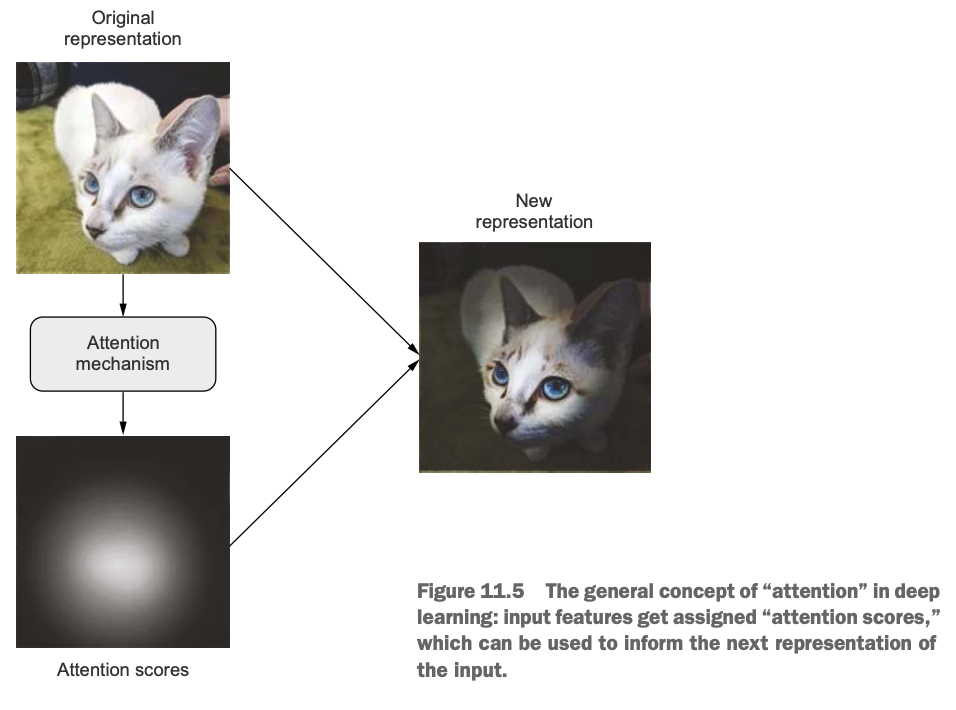

至关重要的是，这种注意力机制不仅可用于突出或擦除某些特征。它可用于使特征上下文感知。您刚刚了解了词嵌入——捕捉不同单词之间语义关系。在嵌入空间中，单个单词具有固定位置——与空间中所有其他单词的固定关系集。但语言的工作原理并不完全不同：一个单词的含义通常因上下文而异。当您标记日期时，您谈论的不是与约会时相同的“日期”，也不是您在市场上购买的日期。当你说“I’ll see you soon”时，“see”一词的含义与“’ll see this project to its end”或“I see what you mean.”中的“see”略有不同。

显然，智能嵌入空间将为单词提供不同的矢量表示，具体取决于单词周围的其他单词。这就是自注意力的作用所在。自注意力的目的是使用序列中相关 tokens 的表示来调整 tokens 的表示形式。这会产生上下文感知的 tokens 表示。举个例子：“The train left the station on time” 现在，考虑句子中的一个单词：station。我们在谈论什么样的车站？可能是广播电台吗？也许是国际空间站？让我们通过自注意力从算法上解决这个问题（见图11.6）。

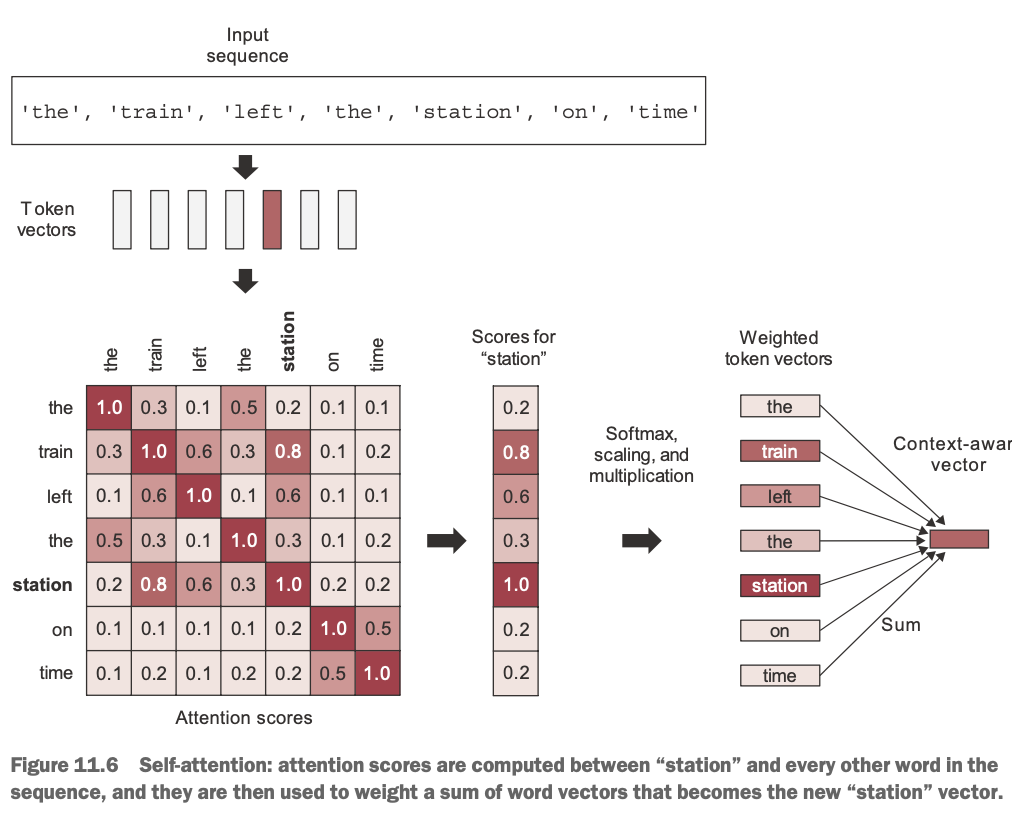

第1步是计算“station”矢量与句子中所有其他单词之间的相关性分数。这些是我们的“注意力分数”。我们只是使用两个单词矢量之间的点积来衡量它们关系的强度。这是一个计算效率很高的距离函数，早在 Transformer 之前，它就已经是将两个单词嵌入相互联系起来的方法。在实践中，这些分数还将经过缩放和softmax，但就目前而言，这只是一个实现细节。

第2步是计算句子中所有单词矢量的和，由我们的相关性分数加权。与“station”密切相关的单词对总和的贡献更大（包括“station”一词本身），而无关的单词几乎不会贡献任何东西。由此产生的矢量是我们对“station”的新表示：一种包含周围上下文的表示。特别是，它包括部分“train”矢量，澄清它实际上是一个“train station”。

您将对句子中的每个单词重复此过程，生成编码句子的新矢量序列。让我们在类似NumPy的伪代码中看到它：

In [41]:
def self_attention(input_sequence):
    output = np.zeros(shape=input_sequence.shape)
    for i, puvot_vector in enumerate(input_sequence):
        scores = np.zeros(shape=(len(input_sequence)))
        for j, vector in enumerate(input_sequence):
            scores[j] = np.dot(pivot_vector, vector.T)
        scores /= np.sqrt(input_sequence.shape[1])
        scores = softmax(scores)
        new_pivot_representation = np.zeros(shape=pivot_vetor.shape)
        for j, vector in enumerate(input_sequence):
            new_pivot_representation += vector * scores[j]
        output[i] = new_pivot_representation
    return output

当然，在实践中，您将使用矢量化实现。Keras有一个内置层来处理它：`MultiHeadAttention` 层。您将像这样使用它：

```python
num_heads = 4
embed_dim = 256
mha_layer = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
outputs = mha_layer(inputs, inputs, inputs)
```

读到这个，你可能想知道
- 为什么我们要将输入传递给层三次？这似乎是多余的。
- 这些“多头”是什么？

**GENERALIZED SELF-ATTENTION: THE QUERY-KEY-VALUE MODEL**

到目前为止，我们只考虑了一个输入序列。然而，Transformer 架构最初是为机器翻译开发的，您必须处理两个输入序列：您目前正在翻译的源序列（如“How’s the weather today？”）和要将其转换为的目标序列（例如“?Qué tiempo hace hoy?”）。Transformer 是一种序列到序列模型：它旨在将一个序列转换为另一个序列。在本章的后面部分，您将深入了解按顺序的模型。

现在让我们后退一步。我们介绍的自注意力机制以示意图的方式执行以下操作：

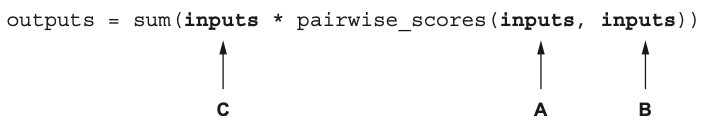

这意味着“对于 inputs(A) 中的每个token，计算token与 input(B) 中的每个 token 的关联程度，并使用这些分数从 input(C) 中加权 token 的和。”至关重要的是，没有任何要求A、B和C引用相同的输入序列。在一般情况下，您可以通过三个不同的序列来做到这一点。我们将称它们为“query”、“key”和“value”。该操作成为“对于query中的每个元素，计算该元素与每个key的关联程度，并使用这些分数来加权 value 之和”：

```
outputs = sum(values * pairwise_scores(query, keys))
```

该术语来自搜索引擎和推荐系统（见图11.7）。想象一下，你正在键入一个 query，从你的收藏中检索一张照片——“海滩上的狗”。在内部，数据库中的每张图片都由一组关键字描述——“猫”、“狗”、“派对”等。我们将称这些为“key”。搜索引擎将首先将您的 query 与数据库中的 key 进行比较。“Dog” 产生1匹配，“cat”产生0匹配。然后，它将根据匹配强度（相关性）对这些 key 进行排名，并将按相关性顺序返回与前N个相关的图片。

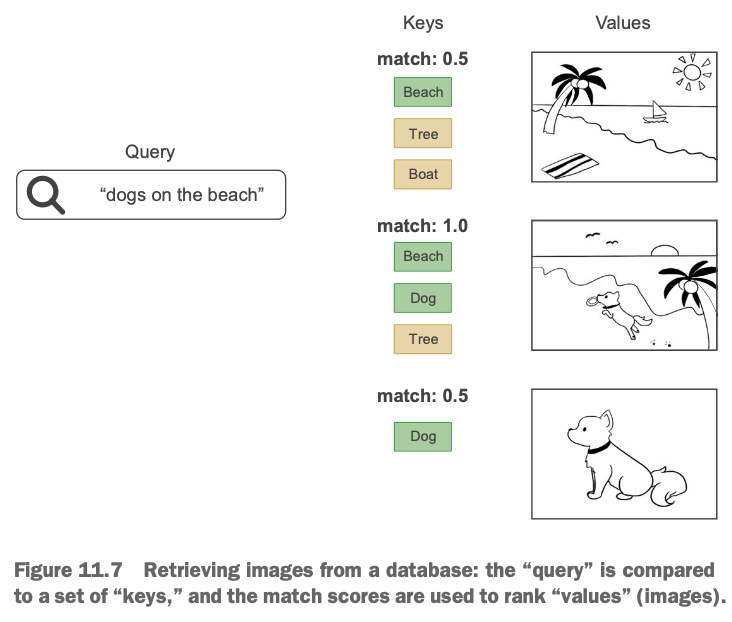

从概念上讲，这就是 Transformer 式的注意力正在做的事情。您有一个引用序列，描述了您要查找的东西：query。您拥有大量知识，您正试图从以下价值观中提取信息。每个 value 都分配了一个 key，该 key 以可以轻松转换为query 的格式描述该值。您只需将 query 与 key 匹配即可。然后你返回一个加权值和。

在实践中，keys 和 value 通常相同。在机器翻译中， query 为目标序列， 源序列为 key 和 value: 对于目标的每个元素(如“tiempo”)， 你想要返回源(“How’s the weather today?”) 并且确定阈值相关的不同位置(“tiempo” 和 “weather” 应该强相关)。 当然，如果您只是进行序列分类，那么query、key 和 value 都是一样的：您将序列与自身进行比较，以丰富整个序列的上下文。

这解释了为什么我们需要将输入传递三次到 `MultiHeadAttention` 层。但为什么要“多头”注意力？

## 11.4.2 Multi-head attention

“Multi-head attention”是对自注意力机制的额外调整，在 “Attention is all you need" 中引入。“multi-head” 是指将自注意力层的输出空间分解为一组独立的子空间，分别学习：初始 query、key 和 value 通过三组独立的密集投影产生三个独立的矢量。每个矢量都通过神经注意进行处理，三个输出串联在一起，形成一个输出序列。每个这样的子空间都被称为“head”。全图如图11.8所示。

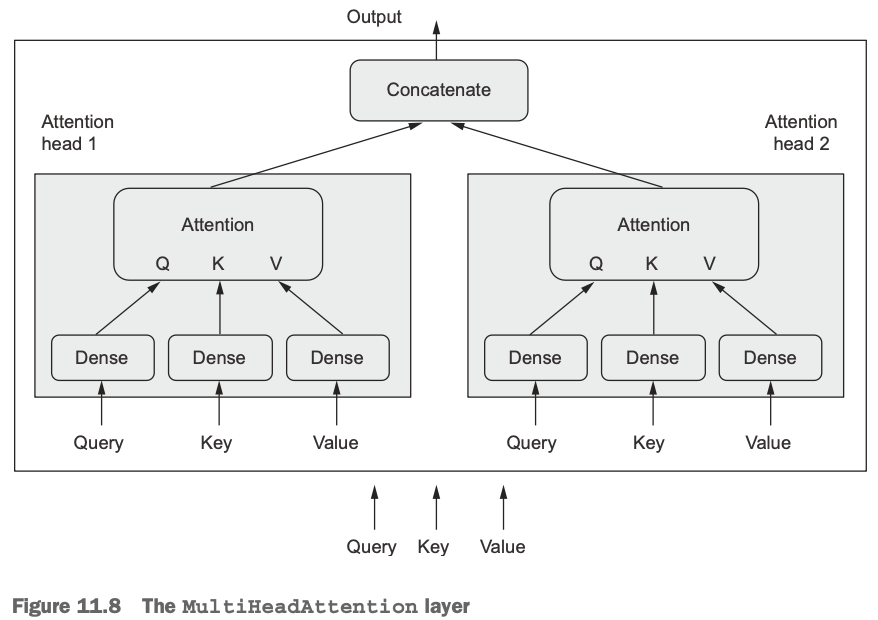


可学习的密集投影的存在使层能够实际学习一些东西，而不是纯粹的无状态转换。此外，拥有独立的头有助于该层为每个 token 学习不同的特征组，其中同一组特征相互关联，但不同组的特征大多独立。

这在原则上类似于 depthwise separable convolutions 的工作原理：在depthwise separable convolution中，卷积的输出空间被分解为许多独立学习的子空间（每个输入通道一个）。“Atten- tion is all you need” 论文是在将特征空间分解为独立子空间的想法被证明为视觉模型提供了巨大好处的时候编写的——无论是在 depthwise separable convolutions 的情况下，还是在密切相关的方法的情况下，`grouped convolutions`。Multi-head attention 只是将同一想法应用于自注意力。

## 11.4.3 The Transformer encoder

如果添加额外的稠密投影如此有用，我们为什么不在注意力机制的输出上应用一两个呢？事实上，这是个好主意——让我们这样做吧。我们的模型开始做很多事情，所以我们可能需要添加残差连接，以确保我们不会在此过程中破坏任何有价值的信息——您在第9章中了解到，它们是任何足够深层次的架构的必备信息。你在第9章中学到了另一件事：归一化层应该有助于梯度在反向传播期间更好地流动。让我们也添加这些。

这大概是我想象在当时 Transformer 架构的发明者脑海中展开的思考过程。将输出分解为多个独立空间，添加残差连接，添加规范化层——所有这些都是标准架构模式，在任何复杂模型中都可以明智地利用。这些 bells 和 whistles 共同构成了 Transformer 编码器——这是构成 Transformer 架构的两个关键部分之一（见图11.9）。

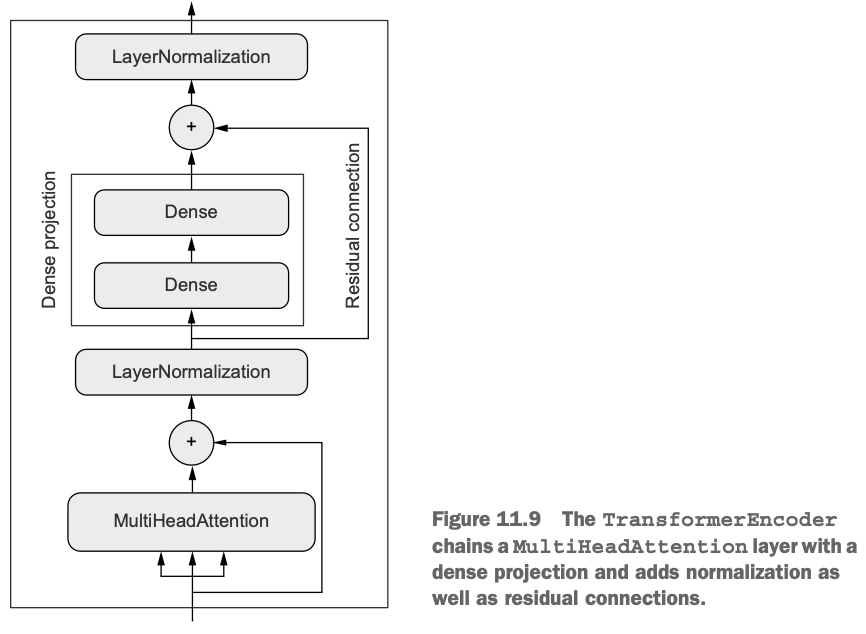

最初的Transformer架构由两部分组成：处理源序列的Transformer编码器和使用源序列生成翻译版本的Transformer解码器。您将在一分钟内了解解码器部分。

至关重要的是，编码器部分可用于文本分类——这是一个非常通用的模块，可以学习将其转换为更有用的表示形式。让我们实现一个 Transformer 编码器，并在电影评论情绪分类任务中尝试它。


In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        
    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output) 
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)
    
    def get_config(self):
        config = super().get_config() 
        config.update({
                "embed_dim": self.embed_dim,
                "num_heads": self.num_heads,
                "dense_dim": self.dense_dim,
        })
        return config

        

**Saving custom layers**

编写自定义层时，请确保实现 `get_config` 方法：这使层能够从其配置命令中重新实例化，这在模型保存和加载期间非常有用。该方法应返回一个Python 字典，该字典包含用于创建图层的构造函数参数的值。

所有Keras层都可以按以下方式序列化和反序列化：

```python
config = layer.get_config()
new_layer = layer.__class__.from_config(config)
```

保存包含自定义层的模型时，保存文件将包含这些配置字典。从文件中加载模型时，您应该向加载过程提供自定义层类，以便它能够理解配置对象：

```python
model = keras.models.load_model(
filename, custom_objects={"PositionalEmbedding": PositionalEmbedding})
```

您会注意到，我们在这里使用的规范化层不是我们之前在图像模型中使用的批处理规范化层。这是因为批处理规范化对序列数据不起作用。我们使用的是层规范化层，该层独立于批处理中的其他序列对每个序列进行规范化。像这样，在类似NumPy的伪代码中：

In [47]:
def layer_normalization(batch_of_sequences):
    mean = np.mean(batch_of_sequences, keepdims=True, axis=-1) 
    variance = np.var(batch_of_sequences, keepdims=True, axis=-1) 
    return (batch_of_sequences - mean) / variance

与 `BatchNormalization` 相比

In [49]:
def batch_normalization(batch_of_images):
    mean = np.mean(batch_of_images, keepdims=True, axis=(0, 1, 2)) 
    variance = np.var(batch_of_images, keepdims=True, axis=(0, 1, 2)) 
    return (batch_of_images - mean) / variance

虽然 `BatchNormalization` 从许多样本中收集信息，以获取特征均值和方差的统计信息，但 `LayerNormalization` 将每个序列中的数据单独汇集，这更适合序列数据。

现在我们已经实现了 `TransformerEncoder`，我们可以用它来组装一个类似于您之前看到的基于GRU的文本分类模型。

In [58]:
vocab_size = 20000
embed_dim = 256
num_heads = 2
dense_dim = 32
inputs = keras.Input(shape=(None,), dtype="int64")
x = layers.Embedding(vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x) 
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs) 
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("transformer_encoder.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, 
          validation_data=int_val_ds, 
          epochs=20,
          callbacks=callbacks)
model = keras.models.load_model(
    "transformer_encoder.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder})
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
embedding_13 (Embedding)     (None, None, 256)         5120000   
_________________________________________________________________
transformer_encoder_4 (Trans (None, None, 256)         543776    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 5,664,033
Trainable params: 5,664,033
Non-trainable params: 0
_________________________________________________

KeyboardInterrupt: 

让我们训练它。它的测试精度达到87.5%——略低于GRU模型。

本节是关于“序列模型”。首先，我强调了单词顺序的重要性。我说 Transformer 是一个序列处理架构，最初是为机器翻译开发的。然而......你刚刚在运行中看到的 Transformer 编码器根本不是序列模型。你注意到了吗？它由相互独立处理序列 tokens 的密集层和一个将 tokens 视为集合的注意力层组成。您可以更改序列中 tokens 的顺序，并获得完全相同的配对注意力分数和完全相同的上下文感知表示。如果你在每部电影评论中完全乱弄单词，模型就并不会发现，你仍然会得到完全相同的准确性。自注意力是一种 set-processing 机制，专注于序列元素对之间的关系（见图11.10），对这些元素是发生在序列的开头、结尾还是中间是不关心的。那么，我们为什么说Transformer 是一个序列模型呢？如果不考虑单词顺序，它怎么可能对机器翻译有好处呢？

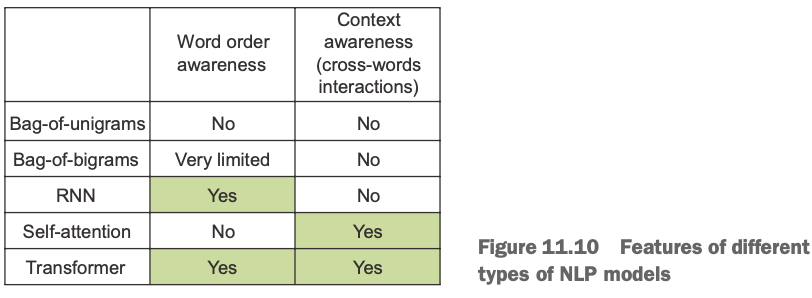

我在本章前面暗示了解决方案：我顺便提到，Transformer是一种混合方法，在技术上是顺序不可知的，但在它处理的表示中手动注入顺序信息。它被称为 `positional encoding`。让我们看看。

**USING POSITIONAL ENCODING TO RE-INJECT ORDER INFORMATION**

位置编码背后的想法很简单：为了让模型访问单词顺序信息，我们将在每个词嵌入中添加单词在句子中的位置。我们的输入词嵌入将有两个组成部分：通常的词向量， 它代表独立于特定上下文的单词，以及一个位置向量，代表单词在当前句子中的位置。模型然后会想出如何最好地利用这些额外信息。

你能想出的最简单的方案是将单词的位置与其嵌入向量连接起来。您将向矢量添加一个“position”轴，并在序列中的第一个单词中用0填充，第二个单词用1填充，依此类推。

然而，这可能并不理想，因为位置可能是非常大的整数，这将破坏嵌入矢量中的值范围。如您所知，神经网络不喜欢非常大的输入值或离散的输入分布。

原始的“Attention is all you need”论文使用了一个有趣的技巧来编码单词位置：它添加了一个包含 `[-1, 1]` 范围内值的矢量，该矢量根据位置周期性变化（它使用余弦函数来实现这一点）。这个技巧提供了一种通过小值矢量对大范围内的任何整数进行唯一表征的方法。它很聪明，但这不是我们打算用的东西。我们将做一些更简单、更有效的事情：我们将学习位置嵌入矢量，就像学习嵌入单词索引一样。然后，我们将把我们的位置嵌入添加到相应的单词嵌入中，以获得位置感知的单词嵌入。这种技术被称为“positional embedding”。让我们实现它。



In [81]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length 
        self.input_dim = input_dim
        self.output_dim = output_dim
    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1) 
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions) 
        return embedded_tokens + embedded_positions
    def compute_mask(self, inputs, mask=None): 
        return tf.math.not_equal(inputs, 0)
    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

您将像常规 `Embedding` 层一样使用此 `PositionEmbedding`。让我们看看它的实际应用！

**PUTTING IT ALL TOGETHER: A TEXT-CLASSIFICATION TRANSFORMER**

要开始考虑单词顺序，您只需将旧的 `Embedding` 层替换为我们的 position-aware 版本。

In [ ]:
vocab_size = 20000
sequence_length = 600
embed_dim = 256
num_heads = 2
dense_dim = 32
inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("full_transformer_encoder.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=20,
     callbacks=callbacks)
model = keras.models.load_model(
    "full_transformer_encoder.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder,
"PositionalEmbedding": PositionalEmbedding}) print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

我们获得了88.3%的测试精度，这是一个扎实的改进，清楚地证明了单词顺序信息对文本分类的价值。这是我们迄今为止最好的序列模型！然而，它仍然比 bag-of-words 方法低一个档次。

## 11.4.4 When to use sequence models over bag-of-words models

您有时可能会听到 bag-of-words 方法已经过时，无论您正在查看什么任务或数据集，基于 Transformer 的序列模型都是一条路。情况肯定不是这样：在许多情况下，在 bag-of-bigrams 上堆叠稠密层仍然是一个完全有效的方法。事实上，在我们整章在IMDB数据集上尝试的各种技术中，到目前为止表现最好的是 bag-of-bigrams！

2017年，我和我的团队对许多不同类型的文本数据集的各种文本分类技术的表现进行了系统分析，我们得出了一条非凡而令人惊讶的经验法则来决定是使用词袋模型还是序列模型。

事实证明，在处理新的文本分类任务时，您应该密切关注训练数据中的样本数量与每个样本的平均字数之间的比率（见图11.11）。如果这个比率很小——不到1500——那么 bag-of-bigrams 模型的性能会更好（作为奖励，训练和迭代也会快得多）。如果该比率高于1500，那么您应该选择序列模型。换句话说，当大量训练数据可用且每个样本相对较短时，序列模型效果最佳。

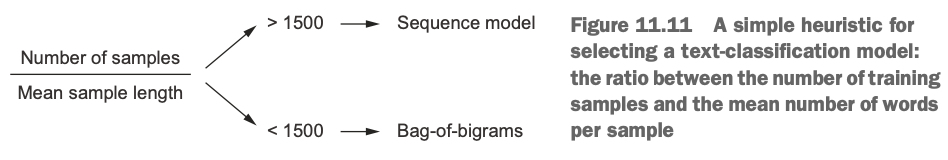

因此，如果您对1000字长的文档进行分类，并且您有10万个文档（比例为100个），您应该选择bigram模型。如果您正在对平均40个单词的推文进行分类，并且您有50,000条推文（比例为1250个），您还应该使用bigram模型。但是，如果您将数据集大小增加到50万条推文（比例为12,500条），请使用 Transformer 编码器。IMDB 影片审核分类任务呢？我们有20,000个训练样本，平均单词计数为233个，因此我们的经验法则指向了一个bigram模型，这证实了我们在实践中发现的内容。

这直观地讲有道理：序列模型的输入代表了一个更丰富、更复杂的空间，因此需要更多数据来映射该空间；而，一组简单的项是一个如此简单的空间，您只需使用数百或数千个样本即可在上面训练逻辑回归。此外，样本越短，模型就越不能丢弃它包含的任何信息——特别是，单词顺序变得更加重要，丢弃它可能会产生歧义。句子 “this movie is the bomb” 和 "this movie was a bomb" 有非常相近的 unigram 表征， 这可能混淆单词袋模型，但序列模型可以判断哪个是负面的，哪个是积极的。有了更长的样本，单词统计将变得更加可靠，仅从单词直方图来看，主题或情绪将更加明显。

现在，请记住，这条启发式规则是专门为文本分类化开发的。它可能不一定能容纳其他NLP任务——例如，当涉及到机器翻译时，Transformer 与RNN相比 特别对非常长的序列有用。我们的启发式也只是经验法则，而不是科学定律，所以希望它大部分时间都能奏效，但不一定每次都起作用。

# 11.5 Beyond text classification: Sequence-to-sequence learning

您现在拥有处理大多数自然语言处理任务所需的所有工具。然而，您只看到这些工具在处理一个问题：文本分类。这是一个非常流行的用例，但NLP除了分类外还有很多。在本节中，您将通过学习序列到序列模型来深化您的专业知识。

序列到序列模型将序列作为输入（通常是句子或段落），并将其转换为不同的序列。这是NLP许多最成功应用程序的核心任务：

- `Machine translation` —— 将源语言中的段落转换为目标语言中的等效段落。
- `Text summarization` —— 将长文档转换为保留重要信息的较短版本。
- `Question answering` —— 将输入问题转换为答案。
- `Chatbots` —— 将对话框提示符转换为对此提示符的回复，或将对话的历史进入对话的下一个回复。
- `Text generation` —— 根据文本提示转换为段落。
- etc

图11.12描述了按顺序模型背后的一般模板。在训练期间
- 编码器模型将源序列转换为中间表示形式。
- 解码器经过训练通过查看前 i-1 个序列预测目标序列中的下一个 token i。

在推断期间，我们无法访问目标序列——我们正试图预先从零开始预测。我们必须一次生成一个 token：

- 我们从编码器获取编码源序列。
- 解码器首先查看编码的源序列以及初始“种子” token（如字符串“`[start]`”），并使用它们来预测序列中的第一个真实 token。
- 到目前为止，预测的序列被反馈到解码器中，解码器生成下一个 token，依此类推，直到它生成停止 token（例如字符串“`[end]`”）。


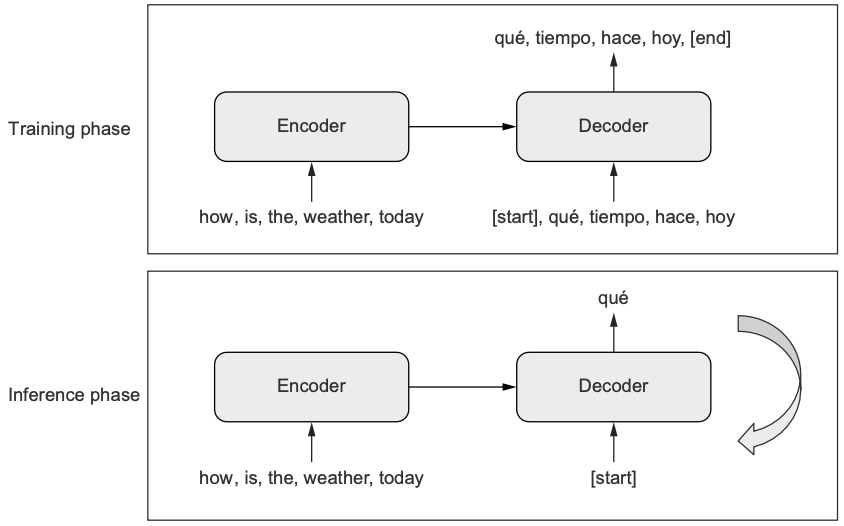


到目前为止，您学到的一切都可以重新用于构建这种新型模型。让我们深入了解一下。

## 11.5.1 A machine translation example

我们将演示机器翻译任务的按顺序建模。机器翻译正是 Transformer 开发的目的！我们将从循环序列模型开始，并跟进完整的 Transformer 架构。

我们将使用[www.manythings.org/anki/](www.manythings.org/anki/) 上的英语到西班牙语翻译数据集。让我们下载它：

```
!wget http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
!unzip -q spa-eng.zip
```

文本文件每行包含一个示例：一个英语句子，后跟一个制表符，然后是相应的西班牙语句子。让我们解析一下这个文件。

In [59]:
text_file = "spa-eng/spa.txt" 
with open(text_file) as f:
    lines = f.read().split("\n")[:-1]
text_pairs = []
for line in lines:
    english, spanish = line.split("\t") 
    spanish = "[start] " + spanish + " [end]" 
    text_pairs.append((english, spanish))

我们的文本对如下所示：

In [60]:
import random
print(random.choice(text_pairs))

('Are you hot?', '[start] ¿Tenéis calor? [end]')


让我们把它们打乱，把它们拆分为通常的训练、验证和测试集：

In [62]:
import random
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples:num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples:]

接下来，让我们准备两个单独的 `TextVectorization` 层：一个用于英语，另一个用于西班牙语。我们需要自定义字符串的预处理方式：

- 我们需要保留我们插入的“`[start]`”和“`[end]`” token。默认情况下，字符`[` 和 `]`将被删除，但我们希望保留它们，以便区分“start”一词和开始 token “`[开始]`”。
- 标点符号因语言而异！在西班牙语 `TextVectorization` 层中，如果我们要删除标点符号，我们还需要剥离字符。

请注意，对于非玩具翻译模型，我们将标点符号字符视为单独的 token，而不是删除它们，因为我们希望能够生成更正正标点符号句子。就我们而言，为了简单起见，我们将消除所有标点符号。

In [64]:
import tensorflow as tf 
import string
import re

strip_chars = string.punctuation + "¿"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

def custom_standardization(input_string): 
    lowercase = tf.strings.lower(input_string) 
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", "")

vocab_size = 15000
sequence_length = 20

source_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)
target_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization, 
)
train_english_texts = [pair[0] for pair in train_pairs] 
train_spanish_texts = [pair[1] for pair in train_pairs] 
source_vectorization.adapt(train_english_texts) 
target_vectorization.adapt(train_spanish_texts)

最后，我们可以将数据转换为 `tf.data` pipeline。我们希望它返回一个元组 `(inputs，target)`，其中 `inputs` 是带有两个 key 的字典，“encoder_inputs”（英语句子）和“decoder_inputs”（西班牙语句子），`target`是带有一个偏移量的西班牙语句子。

In [67]:
batch_size = 64
def format_dataset(eng, spa):
    eng = source_vectorization(eng) 
    spa = target_vectorization(spa) 
    return ({
            "english": eng,
            "spanish": spa[:, :-1],
        }, spa[:, 1:])

def make_dataset(pairs):
    eng_texts, spa_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    spa_texts = list(spa_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, spa_texts)) 
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=4)
    return dataset.shuffle(2048).prefetch(16).cache()

train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

for inputs, targets in train_ds.take(1):
    print(f"inputs['english'].shape: {inputs['english'].shape}")
    print(f"inputs['spanish'].shape: {inputs['spanish'].shape}")
    print(f"targets.shape: {targets.shape}")

inputs['english'].shape: (64, 20)
inputs['spanish'].shape: (64, 20)
targets.shape: (64, 20)


2022-03-13 17:39:58.538788: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## 11.5.2 Sequence-to-sequence learning with RNNs

从2015年到2017年，循环神经网络主导了序列到序列学习，然后被Transformer取代。它们是许多现实世界机器翻译系统的基础——如第10章所述，大约2017年，谷歌翻译由七层大型LSTM层组成。今天仍然值得了解这种方法，因为它为理解序列到序列模型提供了一个简单的切入点。

使用RNN将序列转换为另一个序列的最简单、最天真的方法是在每个时间步骤保持RNN的输出。在Keras，它看起来像这样：

In [68]:
inputs = keras.Input(shape=(sequence_length,), dtype="int64")
x = layers.Embedding(input_dim=vocab_size, output_dim=128)(inputs)
x = layers.LSTM(32, return_sequences=True)(x)
outputs = layers.Dense(vocab_size, activation="softmax")(x)
model = keras.Model(inputs, outputs)

然而，这种方法有两个主要问题：
- 目标序列必须始终与源序列长度相同。在实践中，这种情况很少发生。从技术上讲，这并不重要，因为您可以随时填充源序列或目标序列，使其长度匹配。
- 由于RNN的分步性质，模型将只查看源序列中的tokens 0...N，以预测目标序列中的 token N。这种约束使这种设置不适合大多数任务，特别是翻译。考虑将“The weather is nice today”翻译成法语——那就是“Il fait beaujourd’hui”。你需要能够从“The” 预测 “Il”、从“The Weather”预测“Il fait”，这简直是不可能的。

如果您是人类翻译，在开始翻译之前，您需要先阅读整个源句子。如果您正在处理单词顺序截然不同的语言，如英语和日语，这一点尤为重要。这正是标准序列到序列模型的功能。

在适当的序列到序列设置中（见图11.13），您将首先使用RNN（编码器）将整个源序列转换为单个矢量（或一组矢量）。这可能是RNN的最后一个输出，或者是其最终的内部状态矢量。然后你将该矢量作为另一个RNN(decoder)的 `initial state`， 它会看目标序列中的0...N元素，并尝试预测目标序列中的 N+1 时间步。

让我们使用基于GRU的编码器和解码器在Keras中实现这一点。选择GRU而不是LSTM使事情变得简单一点，因为GRU只有一个状态矢量，而LSTM有多个状态矢量。让我们从编码器开始。

In [70]:
from tensorflow import keras
from tensorflow.keras import layers

embed_dim = 256
latent_dim = 1024

source = keras.Input(shape=(None,), dtype="int64", name="english")
x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(source)
encoded_source = layers.Bidirectional(
    layers.GRU(latent_dim), merge_mode="sum")(x)

接下来，让我们添加解码器——一个简单的GRU层，其初始状态是编码的源句子。除此之外，我们还添加了一个密集层，为每个输出步骤生成西班牙语词汇的概率分布。

In [71]:
past_target = keras.Input(shape=(None,), dtype="int64", name="spanish")
x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(past_target) 
decoder_gru = layers.GRU(latent_dim, return_sequences=True)
x = decoder_gru(x, initial_state=encoded_source) 
x = layers.Dropout(0.5)(x)
target_next_step = layers.Dense(vocab_size, activation="softmax")(x) 
seq2seq_rnn = keras.Model([source, past_target], target_next_step)

在训练期间，解码器将整个目标序列作为输入，但由于RNN的分步性质，它只查看输入中的token 0...N-1 进行预测输出的 token N。这意味着我们应该只使用过去的信息来预测未来；否则我们会作弊，我们的模型在推断时不会起作用。

In [72]:
seq2seq_rnn.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
seq2seq_rnn.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
1302/1302 [==============================] - 1308s 1s/step - loss: 1.6240 - accuracy: 0.4209 - val_loss: 1.3200 - val_accuracy: 0.5069
Epoch 2/15
1302/1302 [==============================] - 1304s 1s/step - loss: 1.3104 - accuracy: 0.5291 - val_loss: 1.1638 - val_accuracy: 0.5654
Epoch 3/15
1302/1302 [==============================] - 1308s 1s/step - loss: 1.1694 - accuracy: 0.5780 - val_loss: 1.0818 - val_accuracy: 0.5988
Epoch 4/15
1302/1302 [==============================] - 1305s 1s/step - loss: 1.0799 - accuracy: 0.6092 - val_loss: 1.0457 - val_accuracy: 0.6165
Epoch 5/15
1302/1302 [==============================] - 1304s 1s/step - loss: 1.0344 - accuracy: 0.6331 - val_loss: 1.0318 - val_accuracy: 0.6265
Epoch 6/15
1228/1302 [===========================>..] - ETA: 1:09 - loss: 1.0046 - accuracy: 0.6505

KeyboardInterrupt: 

我们选择准确性作为在训练期间监控验证集性能的粗略方式。我们达到64%的准确性：平均而言，该模型在64%的时间里正确预测西班牙语句子中的下一个单词。然而，在实践中，下一个 token 的准确性对机器翻译模型来说不是一个好的指标，特别是它假设在预测 token N+1时，正确目标0到N的 token 已经所知。实际上，在推断期间，您正在从头生成目标句子，并且不能保证之前生成的token 100%正确。如果您在现实世界的机器翻译系统上工作，您可能会使用“BLEU分数”来评估模型——该指标查看整个生成的序列，与人类对翻译质量的感知密切相关。

最后，让我们使用我们的模型进行推断。我们将在测试集中选择几句话，并检查我们的模型如何翻译它们。我们将从种子token “`[start]`”开始，并将其与编码的英语源句子一起输入解码器模型。我们将预测下一个 token ，并反复将其重新输入解码器，在每次迭代时采样一个新的目标 `token`，直到我们达到“`[end]`”或达到最大句子长度。


In [73]:
import numpy as np
spa_vocab = target_vectorization.get_vocabulary() 
spa_index_lookup = dict(zip(range(len(spa_vocab)), spa_vocab))
max_decoded_sentence_length = 20

def decode_sequence(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence]) 
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization([decoded_sentence]) 
        next_token_predictions = seq2seq_rnn.predict(
            [tokenized_input_sentence, tokenized_target_sentence])
        sampled_token_index = np.argmax(next_token_predictions[0, i, :])
        sampled_token = spa_index_lookup[sampled_token_index] 
        decoded_sentence += " " + sampled_token
        if sampled_token == "[end]": break
    return decoded_sentence

test_eng_texts = [pair[0] for pair in test_pairs] 
for _ in range(20):
    input_sentence = random.choice(test_eng_texts) 
    print("-")
    print(input_sentence) 
    print(decode_sequence(input_sentence))
    

-
A stranger spoke to me in the bus.
[start] un [UNK] me [UNK] en el autobús [end]
-
They found a mysterious city in ruins in the desert.
[start] ellos [UNK] una ciudad en el [UNK] de la ciudad [end]
-
Let's not go.
[start] no vamos [end]
-
Where are my books?
[start] dónde son mis libros [end]
-
Tom handed Mary a glass of red wine.
[start] tom le dio una [UNK] de mary a vino de vino a vino [end]
-
The street lamps don't give enough light.
[start] la música no se le [UNK] el [UNK] [end]
-
I liked this film.
[start] me gusta esta película [end]
-
If I don't fail, I will get my driving license before New Year.
[start] si no me [UNK] mi año a [UNK] [end]
-
He is after a job.
[start] Él está de trabajo un trabajo [end]
-
I promise you I won't do anything to harm you.
[start] te [UNK] que no te [UNK] a hacer algo [end]
-
He arrived here ten minutes early.
[start] Él llegó aquí antes de diez minutos [end]
-
I've just finished packing.
[start] acabo de llegar de nuevo [end]
-
Just fill this o

请注意，这种推理设置虽然非常简单，但效率相当低，因为我们每次采样新单词时都会复制整个源句和整个生成的目标句子。在实际应用中，您将编码器和解码器分解为两个独立的模型，解码器在每个 token 采样迭代时只会运行一个step，重用其之前的内部状态。

以下是我们的翻译结果。我们的模型对玩具模型来说效果不错，尽管它仍然会犯许多基本错误。

```
Who is in this room?
[start] quién está en esta habitación [end]
-
That doesn't sound too dangerous.
[start] eso no es muy difícil [end]
-
No one will stop me.
[start] nadie me va a hacer [end]
-
Tom is friendly.
[start] tom es un buen [UNK] [end]
```

这个玩具模型有很多改进的方法：我们可以为编码器和解码器堆叠深层的循环层（请注意，对于解码器，这让状态管理更加复杂）。我们可以使用LSTM而不是GRU等等。然而，除了这些调整外，RNN对序列学习的方法也有一些基本的限制：

- 源序列表示必须完全保存在编码器状态向量中，这极大地限制了您可以翻译的句子的大小和复杂性。这有点像一个人完全凭记忆翻译句子，在翻译时没有理解源句子。
- RNN很难处理很长的序列，因为他们倾向于忘记过去——当你在这两个序列中达到第100个 token 时，关于序列开始的信息就很少了。这意味着基于RNN的模型无法保持长期上下文，这对翻译长文档至关重要。

这些限制导致机器学习社区使用 Transformer 架构来解决序列对序列问题的原因。

## 11.5.3 Sequence-to-sequence learning with Transformer

序列到序列学习是 Transformer 真正发光的任务。神经注意力使Transformer模型能够成功处理比这些RNN所能处理的更长、更复杂的序列。

作为一个将英语翻译成西班牙语的人，你不会读英语句子时一次读一个单词的，记住它的含义，然后生成西班牙语句子时一次生成一个单词。这可能适用于五个字的句子，但不太可能适用于整个段落。相反，您可能希望在源句和正在进行的翻译之间来回切换，并在写下翻译的不同部分时将注意力放在源句子中的不同单词。

这正是你通过神经注意力和 Transformer 所能实现的。您已经熟悉Transformer 编码器，该编码器使用自注意力来生成输入序列中每个token 的上下文感知表示。在序列到序列 Transformer 中， Transformer 编码器自然扮演编码器的角色，编码器读取源序列并生成源序列的编码表示。然而，与我们之前的RNN编码器不同，变压器编码器以序列格式保持编码表示：这是一个上下文感知的嵌入矢量序列。

模型的后半部分是 Transformer 解码器。就像RNN解码器一样，它读取目标序列中的 token 0...N，并试图预测 token N+1。至关重要的是，在这样做时，它使用神经注意力来识别编码源句中的哪些 token 与它目前正在试图预测的目标 token 关系最密切——与人类翻译会做的事情没有什么不同。回顾 query key value模型：在 Transformer 解码器中，目标序列用作注意“query”，用于更密切地关注源序列的不同部分（源序列同时扮演 key 和 value的角色）。

**THE TRANSFORMER DECODER**

图11.14显示了完整的序列到序列 Transformer 。看看解码器内部：你会发现它看起来与 Transformer 编码器非常相似，只是在应用于目标序列的自注意力块和 exit 块的密集层之间插入了一个额外的注意力块。

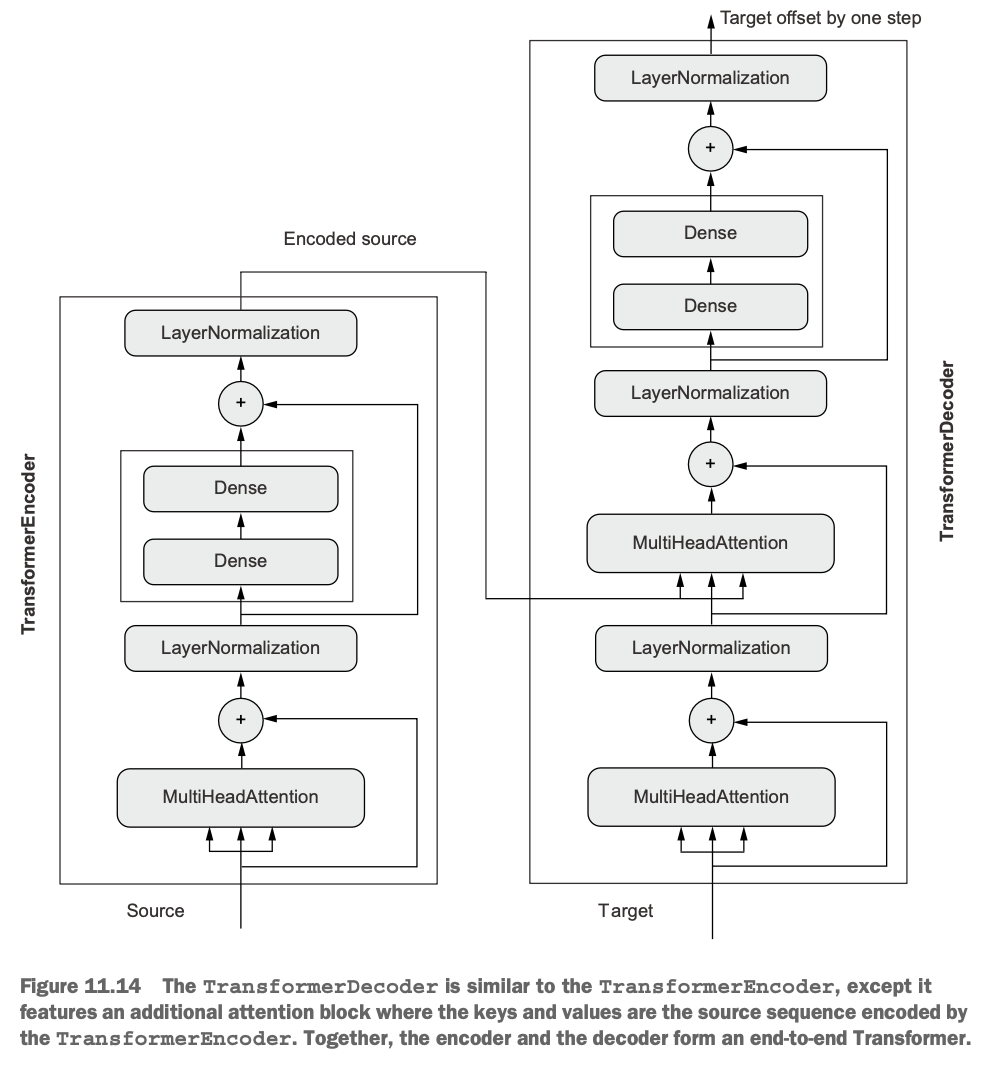

让我们实现它。与 `TransformerEncoder` 一样，我们将使用层子类。在我们专注于call()、方法、操作发生的地方之前，让我们先定义类构造函数，其中包含我们需要的层。



In [92]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True
    def get_config(self):
        config = super().get_config() 
        config.update({
                "embed_dim": self.embed_dim,
                "num_heads": self.num_heads,
                "dense_dim": self.dense_dim,
        })
        return config
    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
                 [tf.expand_dims(batch_size, -1),
                  tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)
    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(
                    mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1) 
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(
            attention_output_1 + attention_output_2)
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)


`call()` 方法几乎是图11.14中连接图的简单渲染。但我们需要考虑一个额外的细节：`causal padding`。 causal padding 对于成功训练序列到序列 Transformer 绝对至关重要。与RNN不同，RNN一次查看其输入，RNN要生成输出步骤N(目标是目标序列中的令牌N+1), 只能先访问步骤0...N，`TransformerDecoder` 是顺序无关的：它同时查看整个目标序列。如果允许它使用其整个输入，它只需学习将输入时间步N+1复制到输出中的时间步N。因此，该模型将实现完美的训练准确性，但当然，在运行推理时，它将完全无用，因为N以外的输入步骤不可用。

修复方法很简单：我们将 mask 配对注意力矩阵的上半部分，以避免模型对未来信息的任何注意力——生成目标token N+1时， 应仅使用来自目标序列 token 0......N 中的信息。为此，我们将在`TransformerDecoder` 中添加 `get_causal_attention_mask(self，inputs)` 方法，以检索我们可以传递给 `MultiHeadAttention` 层的注意力掩码。

In [74]:
def get_causal_attention_mask(self, inputs):
    input_shape = tf.shape(inputs)
    batch_size, sequence_length = input_shape[0], input_shape[1]
    i = tf.range(sequence_length)[:, tf.newaxis]
    j = tf.range(sequence_length)
    mask = tf.cast(i >= j, dtype="int32")
    mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
    mult = tf.concat(
             [tf.expand_dims(batch_size, -1),
              tf.constant([1, 1], dtype=tf.int32)], axis=0)
    return tf.tile(mask, mult)

现在我们可以实现解码器前向传播的完整call()方法。

In [76]:
def call(self, inputs, encoder_outputs, mask=None):
    causal_mask = self.get_causal_attention_mask(inputs)
    if mask is not None:
        padding_mask = tf.cast(
                mask[:, tf.newaxis, :], dtype="int32")
        padding_mask = tf.minimum(padding_mask, causal_mask)
    attention_output_1 = self.attention_1(
        query=inputs,
        value=inputs,
        key=inputs,
        attention_mask=causal_mask)
    attention_output_1 = self.layernorm_1(inputs + attention_output_1) 
    attention_output_2 = self.attention_2(
        query=attention_output_1,
        value=encoder_outputs,
        key=encoder_outputs,
        attention_mask=padding_mask,
    )
    attention_output_2 = self.layernorm_2(
        attention_output_1 + attention_output_2)
    proj_output = self.dense_proj(attention_output_2)
    return self.layernorm_3(attention_output_2 + proj_output)


In [104]:
import numpy as np

i = np.arange(10)[:, None]
j = np.arange(10)
mask = (i >= j)
mult = np.concatenate(
    [np.expand_dims(2, -1),
     np.array([1, 1])], axis=0
)
print(i)
print(j)
print(mask)
print(mult)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 1 2 3 4 5 6 7 8 9]
[[ True False False False False False False False False False]
 [ True  True False False False False False False False False]
 [ True  True  True False False False False False False False]
 [ True  True  True  True False False False False False False]
 [ True  True  True  True  True False False False False False]
 [ True  True  True  True  True  True False False False False]
 [ True  True  True  True  True  True  True False False False]
 [ True  True  True  True  True  True  True  True False False]
 [ True  True  True  True  True  True  True  True  True False]
 [ True  True  True  True  True  True  True  True  True  True]]
[2 1 1]


**PUTTING IT ALL TOGETHER: A TRANSFORMER FOR MACHINE TRANSLATION**

端到端 Transformer 是我们将要训练的模型。它在未来一步将源序列和目标序列映射到目标序列。它结合了我们迄今为止构建的组件： `PositionalEmbedding` 层、`TransformerEncoder` 器和 `TransformerDecoder`。请注意，`TransformerEncoder` 和`TransformerDecoder` 都是形状不变的，因此您可以堆叠其中许多层，以创建一个更强大的编码器或解码器。在我们的示例中，我们将坚持每个示例使用单层。

In [83]:
embed_dim = 256 
dense_dim = 2048 
num_heads = 8

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="english")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="spanish")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
transformer.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
transformer.fit(train_ds,
                epochs=1, 
                validation_data=val_ds)

1302/1302 [==============================] - 648s 497ms/step - loss: 1.7102 - accuracy: 0.4035 - val_loss: 1.3602 - val_accuracy: 0.4967


我们现在准备训练我们的模型——我们的精度达到67%，比基于GRU的模型高得多。

最后，让我们尝试使用我们的模型从测试集中翻译前所未有的英语句子。该设置与我们用于序列到序列RNN模型的设置相同。

In [86]:
import numpy as np
spa_vocab = target_vectorization.get_vocabulary() 
spa_index_lookup = dict(zip(range(len(spa_vocab)), spa_vocab)) 
max_decoded_sentence_length = 20

def decode_sequence(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization([decoded_sentence])[:, :-1]
        predictions = transformer(
            [tokenized_input_sentence, tokenized_target_sentence])
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = spa_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token
        if sampled_token == "[end]":
            break
    return decoded_sentence

test_eng_texts = [pair[0] for pair in test_pairs] 
for _ in range(20):
    input_sentence = random.choice(test_eng_texts) 
    print("-")
    print(input_sentence) 
    print(decode_sequence(input_sentence))

-
You should have seen it!
[start] deberías ir [end]
-
When will they arrive?
[start] cuándo nos [UNK] [end]
-
I never told anybody about it, I swear.
[start] no me dijo qué él [end]
-
Mother Teresa was a Catholic nun who lived and worked in Calcutta, India.
[start] a mary fue un segundo que se fue que la y la universidad [end]
-
His aunt takes care of his dog during the day.
[start] su hijo se hizo un perro de día de día [end]
-
I'm glad we agree on something.
[start] me voy de hablar algo de algo [end]
-
Tom tried to comfort Mary.
[start] tom trató de ir a mary [end]
-
I haven't seen you in a long time.
[start] no te he visto en un tiempo [end]
-
Tom knows a few magic tricks.
[start] tom sabe un poco de los resultados [end]
-
Don't call me anymore.
[start] no me [UNK] mi ayuda [end]
-
Tom stood at the window and, in the fading light, began to play the trumpet.
[start] tom se se en la policía y la policía de la escuela y se [UNK] [end]
-
He devoted all his time to the study of history

从主观上讲，Transformer 的性能似乎比基于GRU的翻译模型要好得多。它仍然是一个玩具模型，但它是一个更好的玩具模型。

关于自然语言处理的这一章到此结束——你刚刚从最基本的东西变成了一个成熟的Transformer ，可以从英语翻译成西班牙语。

# Summary

- 有两种NLP模型：在不考虑单词顺序的情况下处理单词集或N-gram的词袋模型，以及支持单词顺序的序列模型。词袋模型由密集层组成，而序列模型可以是RNN、1D卷积或Transformer。
- 在文本分类方面，训练数据中的样本数量与每个样本的平均字数之间的比率可以帮助您确定是应该使用词袋模型还是序列模型。
- 词嵌入是矢量空间，其中单词之间的语义关系被建模为代表这些单词的矢量之间的距离关系。
- 序列到序列学习是一个通用、强大的学习框架，可用于解决许多NLP问题，包括机器翻译。序列到序列模型由处理源序列的编码器和解码器组成，解码器试图借助编码器处理的源序列，通过查看过去的 token 来预测目标序列中的未来 token。
- 神经注意力是创建上下文感知单词表示的一种方式。这是 Transformer 架构的基础。
- Transformer 架构由 Transformer 编码器和 Transformer 解码器组成，在序列到序列的任务上产生出色的结果。前半部分，`TransformerEncoder`，也可用于文本分类或任何类型的单输入NLP任务。